# Trends between Countries with respect to CO2 emission and the increase in temperature over the years.

### Gaussian Mixture Model and K-Means Clustering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# add all lib imports here
#
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

<ipython-input-63-e81fd127ba9e>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
#import numpy as np
from sklearn.mixture import GaussianMixture

In [ ]:
## load data from google drive
##
# temp data by country
mydrive = "/content/drive/My Drive/ML-Summer-2023/The Martians/Data/GlobalLandTemperaturesByCountry.csv"
profdrive="/content/drive/MyDrive/ML-Summer-2023/The Martians/Data"
filename1="GlobalLandTemperaturesByCountry.csv"
filename2="FT2021_fossil_CO2_booklet_2022.xlsx"
filename3="crop_production.csv"
import os
os.chdir(profdrive)

data_temp_country = pd.read_csv(filename1) # till Aug 2013

# C02 data by country  till Aug 2013
data_co2_country = pd.read_excel(filename2,sheet_name="fossil_CO2_totals_by_country")
# https://www.kaggle.com/datasets/thedevastator/global-fossil-co2-emissions-by-country-2002-2022?select=GCB2022v27_MtCO2_flat_metadata.json for meta data

# crop data is in 2nd sheet , for every 20 year time span
# we should changes this data , as this data don't have yearly values
#data_crops_country= pd.read_excel("/content/drive/My Drive/The Martians/Data/crops-yield-changes-hadcm3-sres.xls",sheet_name=2)
# mew crop data
data_crops_country= pd.read_csv(filename3)

In [ ]:
data_co2_country.head()

Substance EDGAR Country Code                 Country        1970  \
0       CO2                ABW                   Aruba    0.081876   
1       CO2                AFG             Afghanistan    1.739541   
2       CO2                AGO                  Angola    8.952570   
3       CO2                AIA                Anguilla    0.002168   
4       CO2                AIR  International Aviation  169.300997   

         1971        1972        1973        1974        1975        1976  \
0    0.081889    0.095415    0.099630    0.089089    0.105139    0.096041   
1    1.737823    1.715749    1.742813    2.198551    2.037627    1.899895   
2    8.538308   10.388519   11.372301   11.833761   10.930423    7.317385   
3    0.002168    0.002264    0.002109    0.002350    0.002584    0.002434   
4  169.300997  179.147487  186.892096  179.793331  173.866020  174.273791   

   ...        2012        2013        2014        2015        2016  \
0  ...    1.618441    1.588689    1.615728    1.607879    1.578644   
1  ...   10.238064    8.484183    8.016290    8.361849    7.635914   
2  ...   24.186843   27.822325   30.407844   32.594130   30.691660   
3  ...    0.026023    0.027941    0.027896    0.028005    0.028340   
4  ...  472.721119  480.909126  496.627697  524.654035  548.207777   

         2017        2018        2019        2020        2021  
0    1.315458    1.347594    1.387156    1.144333    1.274134  
1    8.145255    9.106997    8.082724    8.183718    8.347669  
2   26.129882   24.048619   25.325994   23.055844   24.450057  
3    0.029062    0.028223    0.027580    0.022779    0.025409  
4  582.230490  609.630469  617.763229  338.144083  390.166250  

[5 rows x 55 columns]

In [ ]:
df_co2_final=data_co2_country.iloc[:209]
df_co2_final=df_co2_final[~(df_co2_final["Country"]=="International Aviation")]
df_co2_final.reset_index(inplace=True)
df_co2_final=df_co2_final.loc[:,"EDGAR Country Code":]

Checking for missing values and duplicate values

In [ ]:
df_co2_final.isna().sum()

EDGAR Country Code    0
Country               0
1970                  0
1971                  0
1972                  0
1973                  0
1974                  0
1975                  0
1976                  0
1977                  0
1978                  0
1979                  0
1980                  0
1981                  0
1982                  0
1983                  0
1984                  0
1985                  0
1986                  0
1987                  0
1988                  0
1989                  0
1990                  0
1991                  0
1992                  0
1993                  0
1994                  0
1995                  0
1996                  0
1997                  0
1998                  0
1999                  0
2000                  0
2001                  0
2002                  0
2003                  0
2004                  0
2005                  0
2006                  0
2007                  0
2008                  0
2009            

In [ ]:
df_co2_final.duplicated().sum()

0

There are no missing or duplicate values

In [ ]:
df_co2_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 54 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EDGAR Country Code  208 non-null    object 
 1   Country             208 non-null    object 
 2   1970                208 non-null    float64
 3   1971                208 non-null    float64
 4   1972                208 non-null    float64
 5   1973                208 non-null    float64
 6   1974                208 non-null    float64
 7   1975                208 non-null    float64
 8   1976                208 non-null    float64
 9   1977                208 non-null    float64
 10  1978                208 non-null    float64
 11  1979                208 non-null    float64
 12  1980                208 non-null    float64
 13  1981                208 non-null    float64
 14  1982                208 non-null    float64
 15  1983                208 non-null    float64
 16  1984    

Check for any error data (negative values)

In [ ]:
df_co2_final.min()

EDGAR Country Code            ABW
Country               Afghanistan
1970                     0.000792
1971                     0.000831
1972                     0.000873
1973                     0.000915
1974                     0.000959
1975                     0.001004
1976                     0.001039
1977                     0.001076
1978                     0.001113
1979                      0.00115
1980                     0.001188
1981                     0.001217
1982                     0.001245
1983                     0.001274
1984                     0.001304
1985                     0.001335
1986                      0.00137
1987                     0.001406
1988                     0.001442
1989                     0.001469
1990                     0.001492
1991                     0.001507
1992                     0.001512
1993                     0.001513
1994                     0.001522
1995                     0.001532
1996                     0.001549
1997          

In [ ]:
df_co2_final.max()

EDGAR Country Code             ZMB
Country                     Zambia
1970                    4693.30024
1971                   4556.628536
1972                   4805.782899
1973                   4993.579237
1974                   4828.733417
1975                   4615.234021
1976                   4909.768543
1977                   5073.859718
1978                   5064.535787
1979                    5103.59537
1980                   4877.337951
1981                   4808.585985
1982                   4563.081168
1983                   4542.189353
1984                   4752.535117
1985                   4778.509341
1986                   4737.863736
1987                   4895.436389
1988                   5118.629932
1989                   5176.126977
1990                   5067.479546
1991                   5025.951278
1992                   5106.826241
1993                   5225.130773
1994                   5308.827872
1995                   5360.921019
1996                

Visualizing for Outliers, but here the outliers are expected as over the years there had been different factors for each country which would have countributed in increasing or decreasing of CO2 for a country. And hence will keep them as part of dataset

<ipython-input-73-e4ccbf62349c>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize =(5, 3))


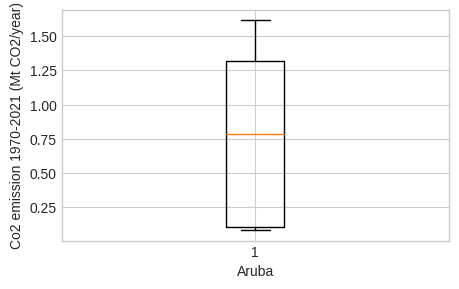

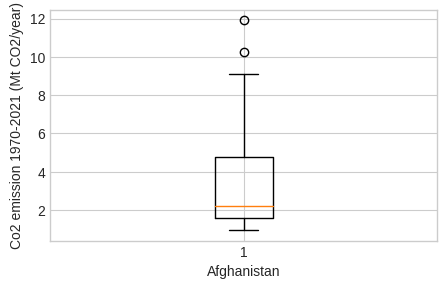

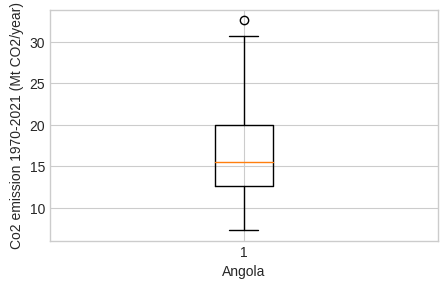

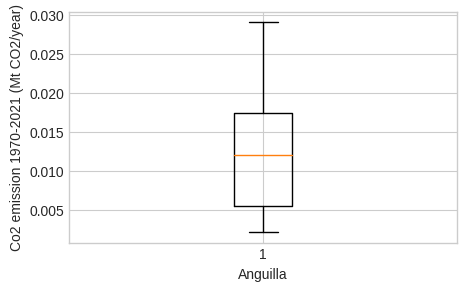

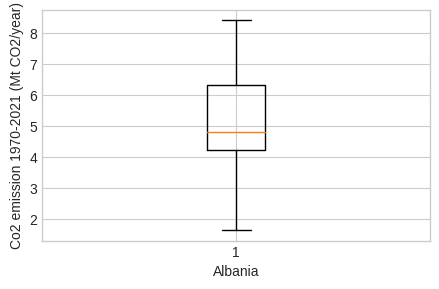

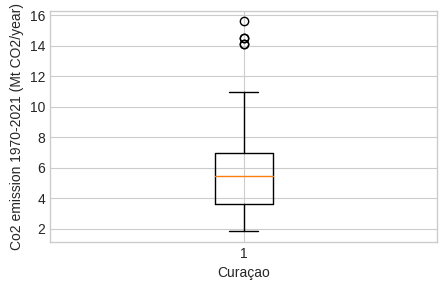

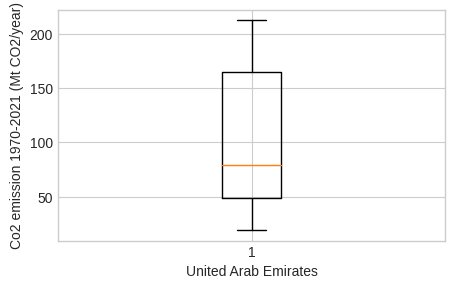

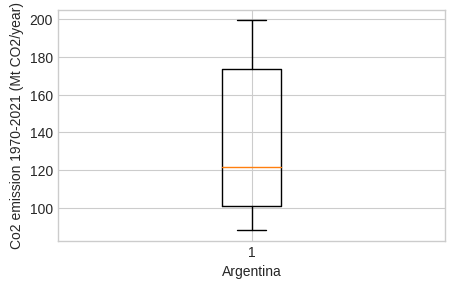

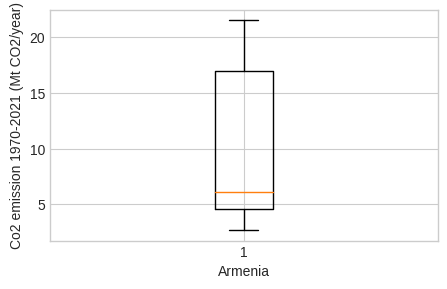

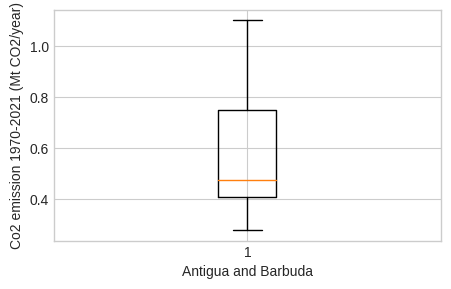

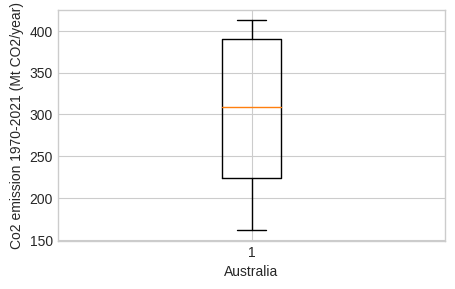

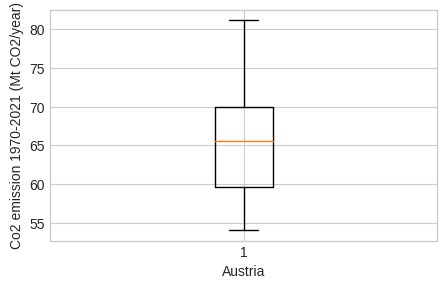

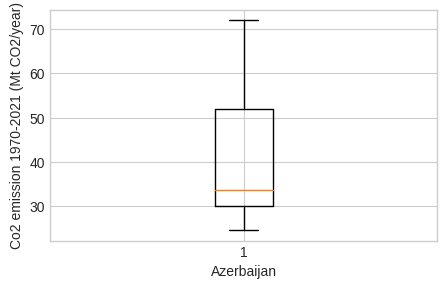

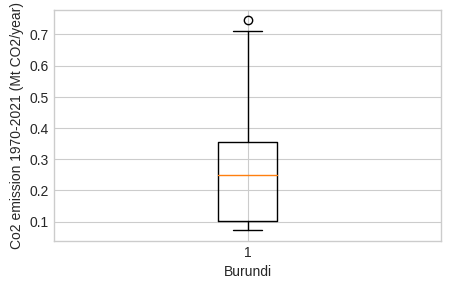

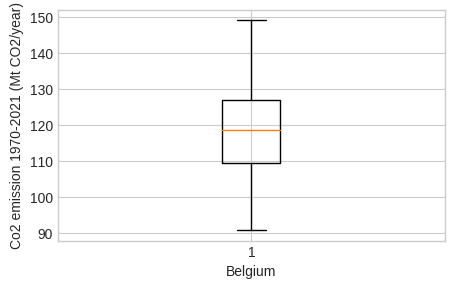

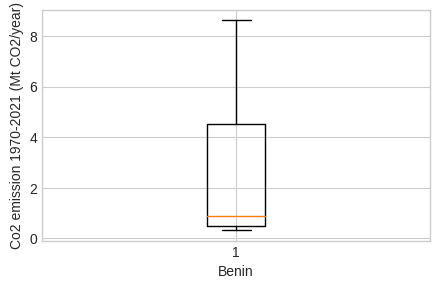

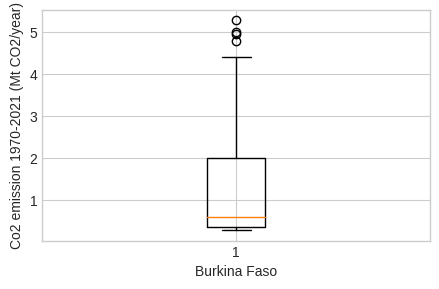

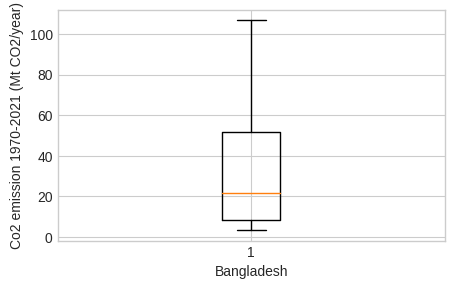

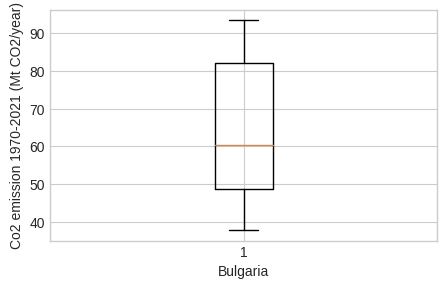

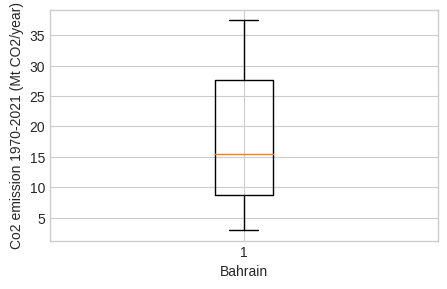

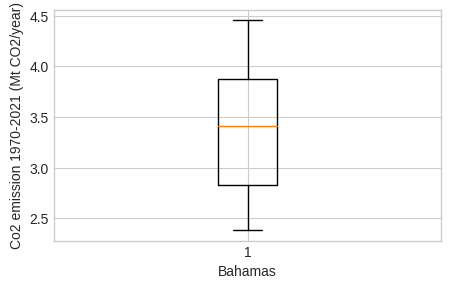

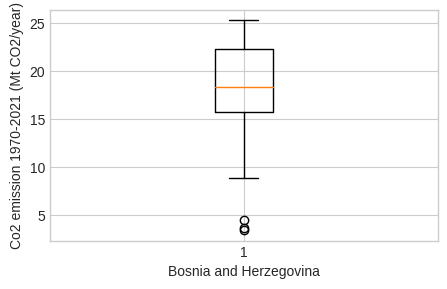

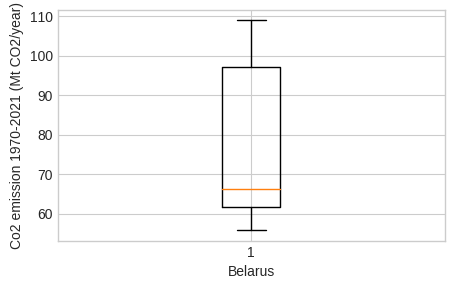

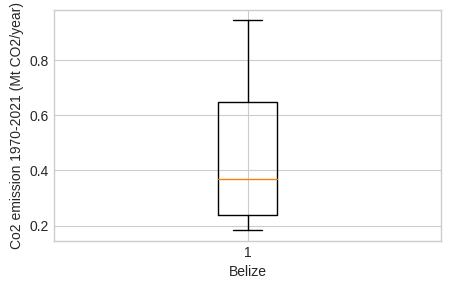

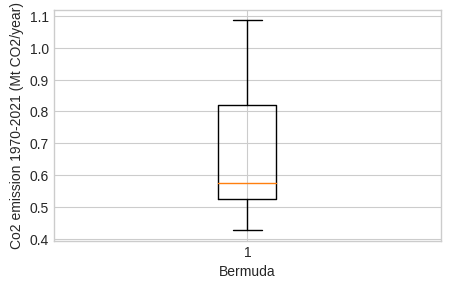

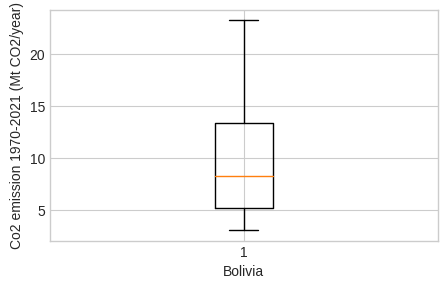

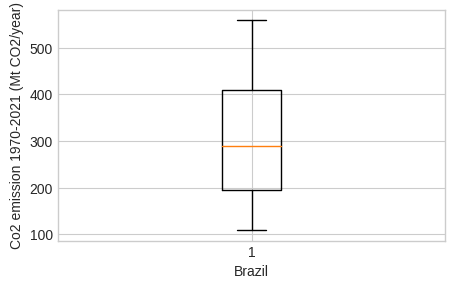

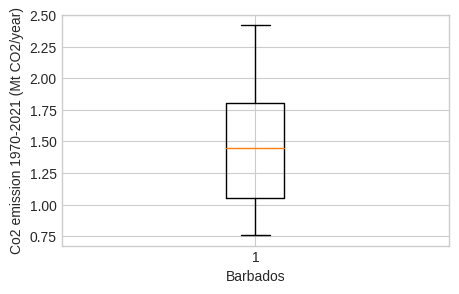

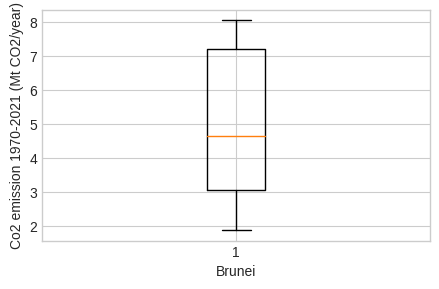

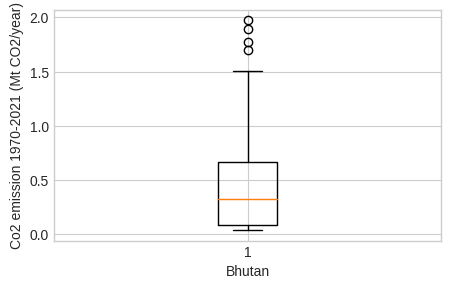

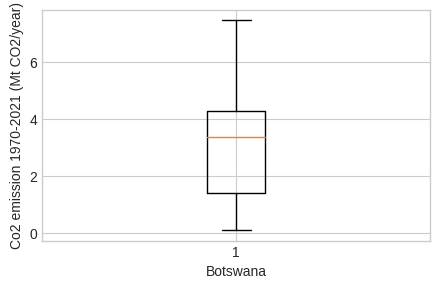

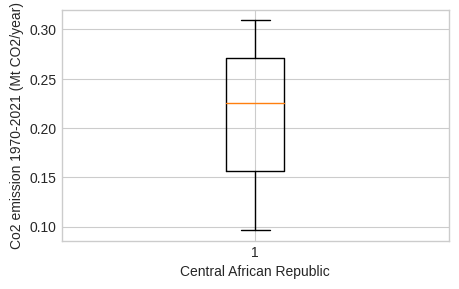

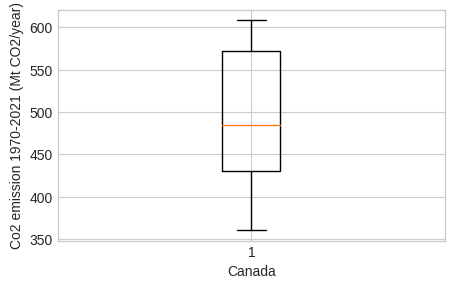

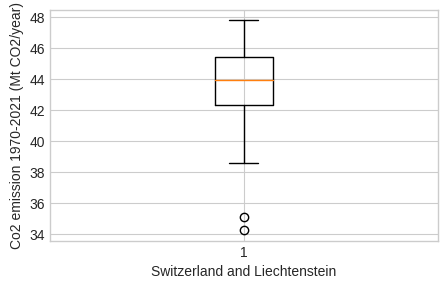

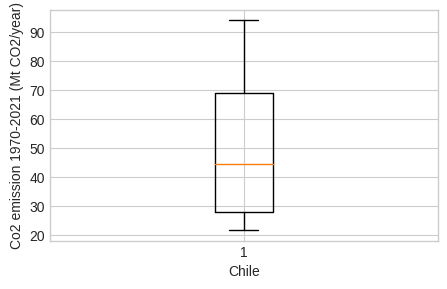

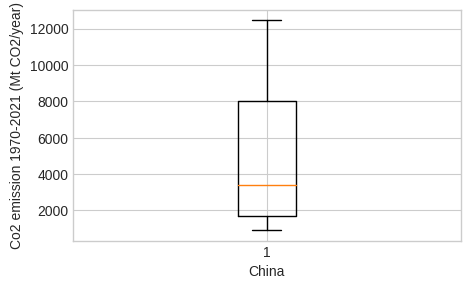

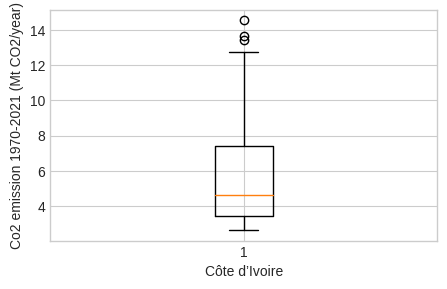

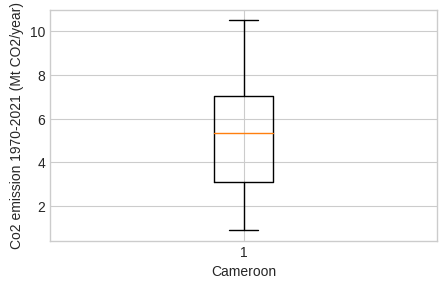

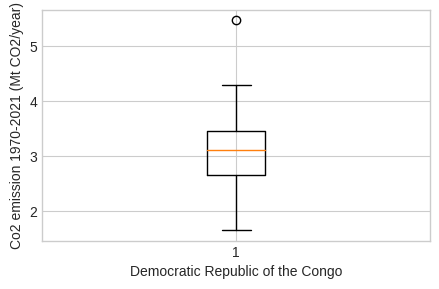

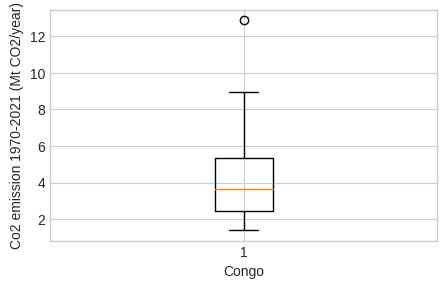

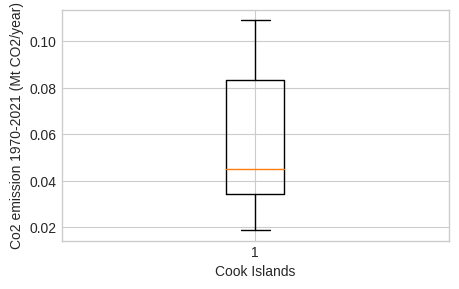

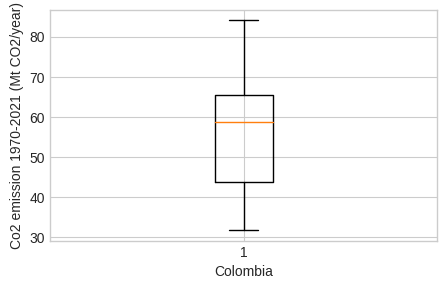

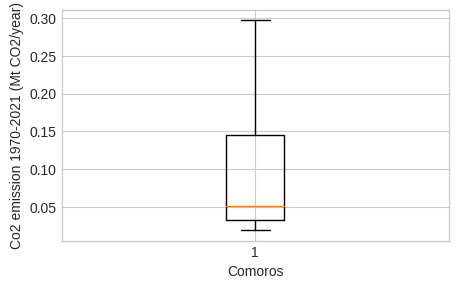

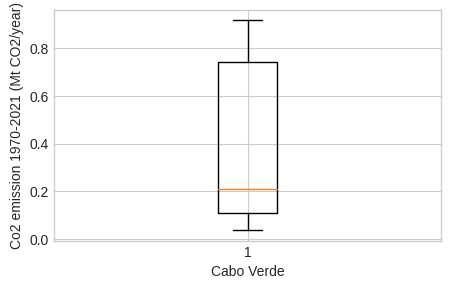

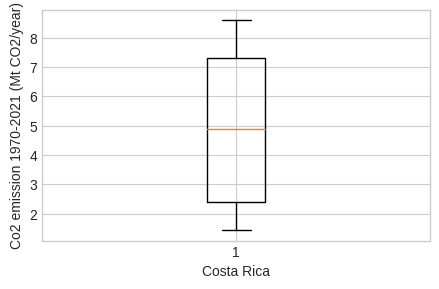

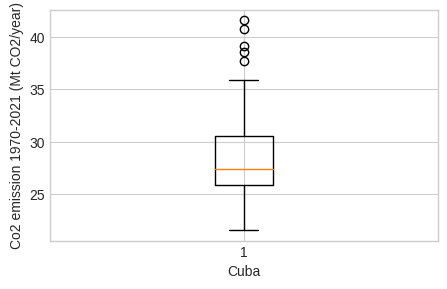

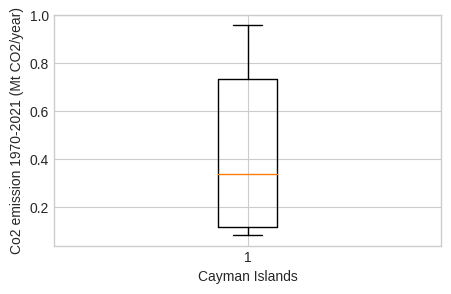

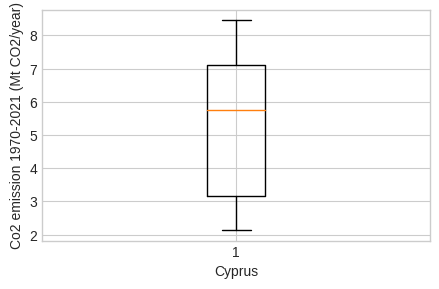

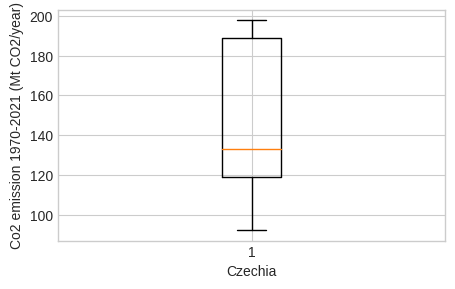

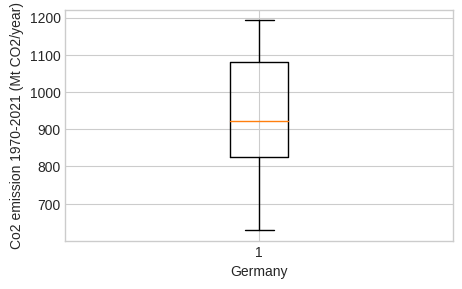

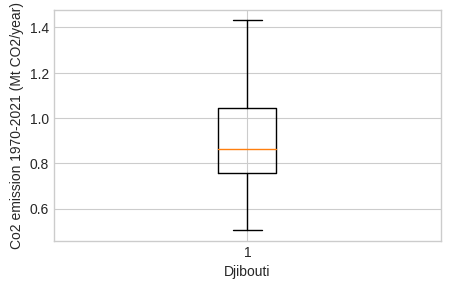

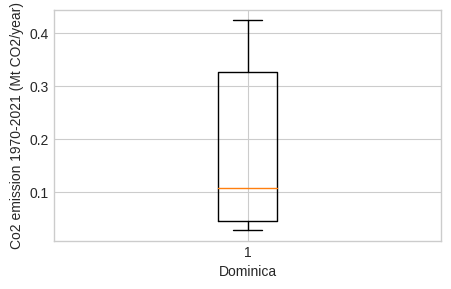

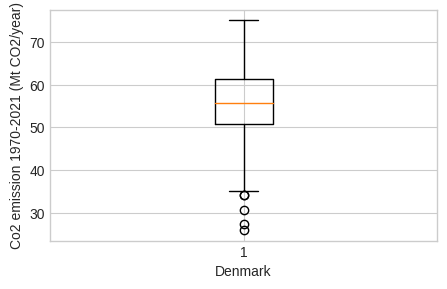

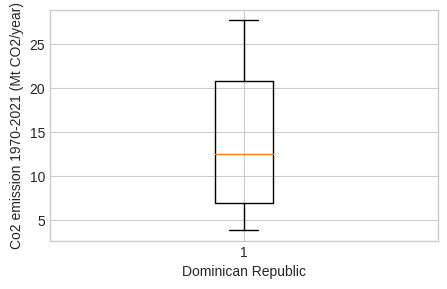

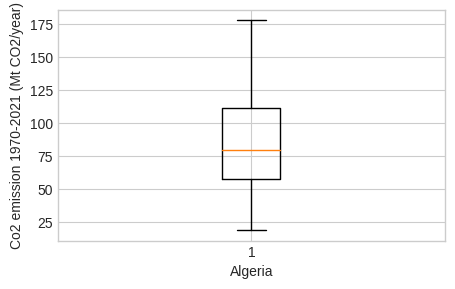

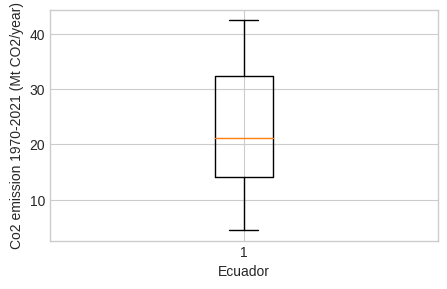

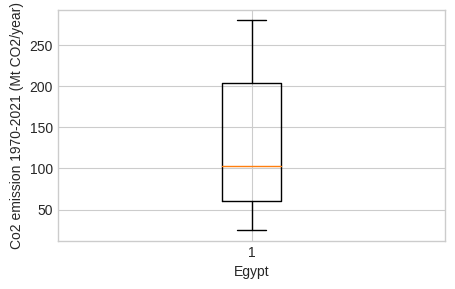

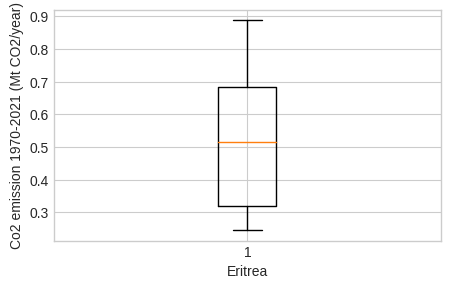

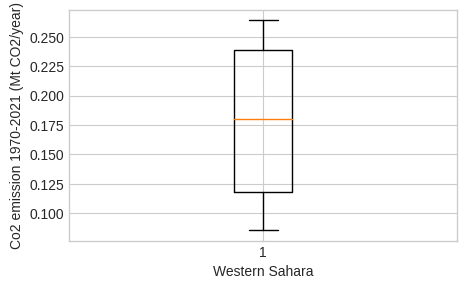

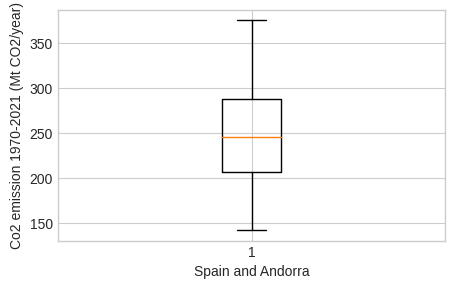

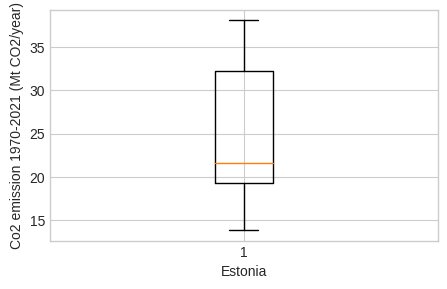

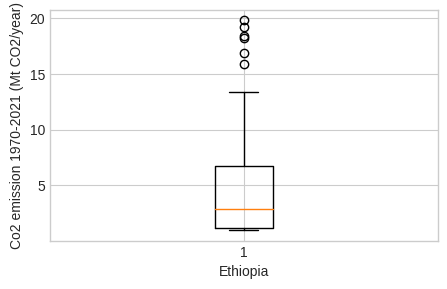

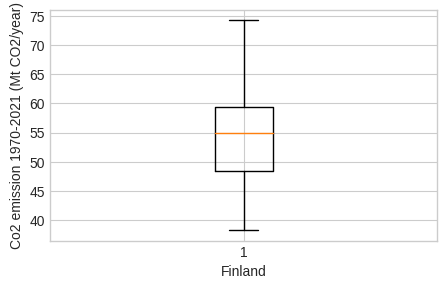

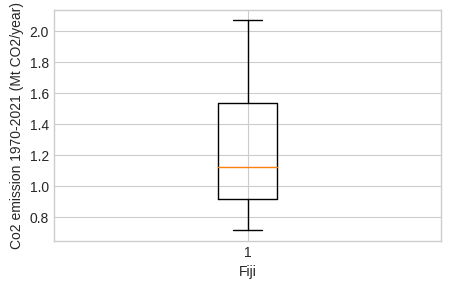

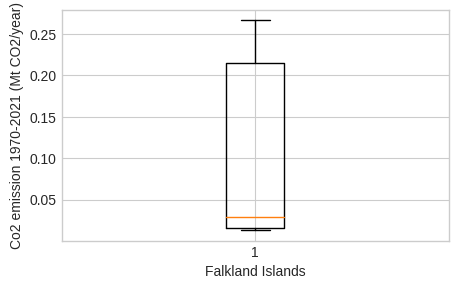

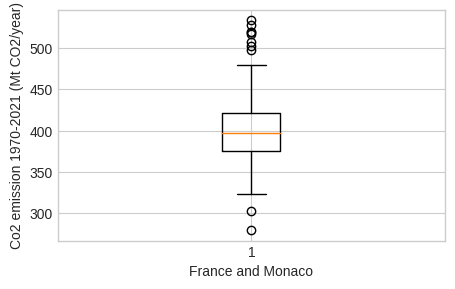

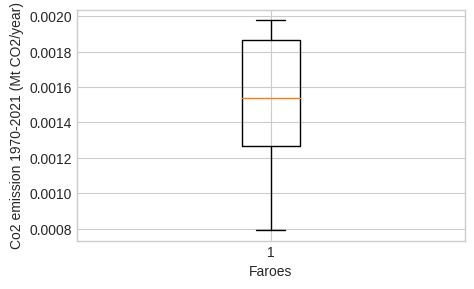

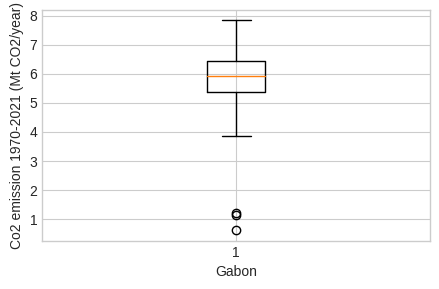

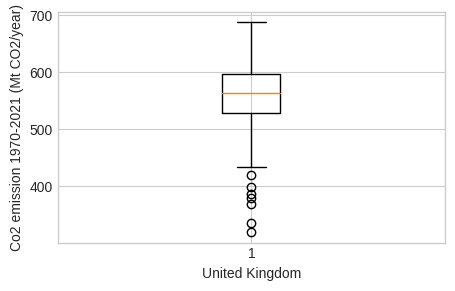

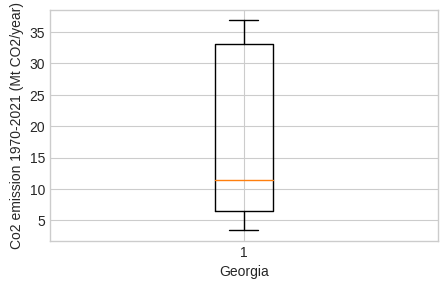

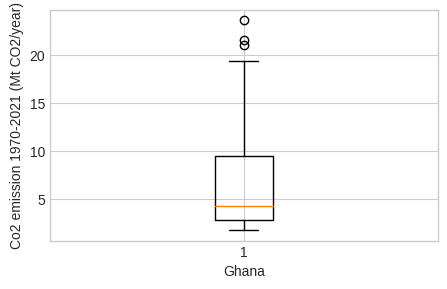

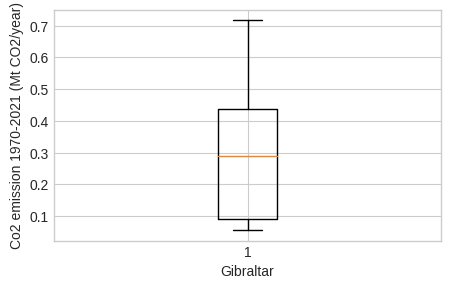

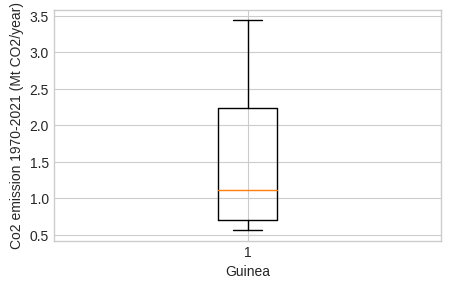

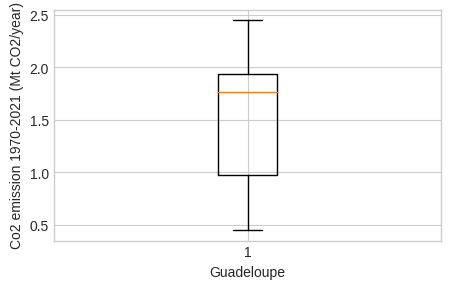

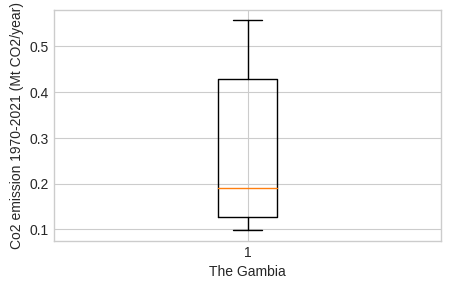

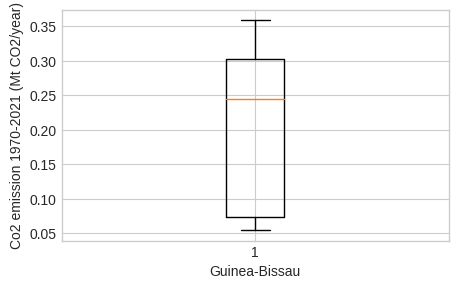

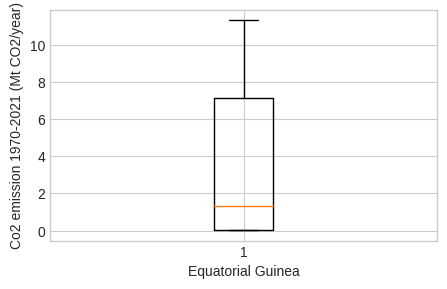

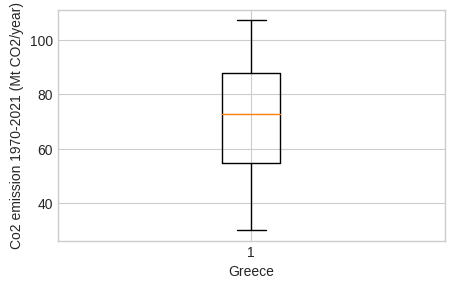

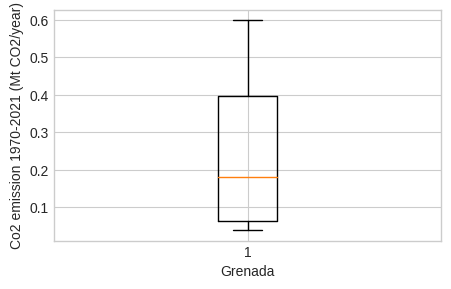

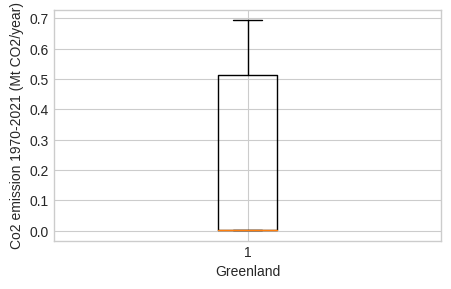

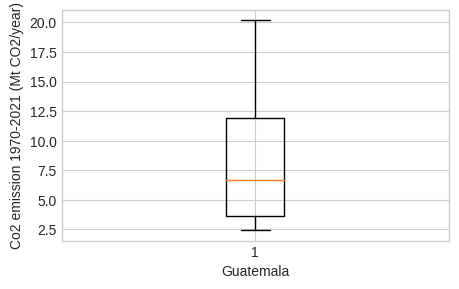

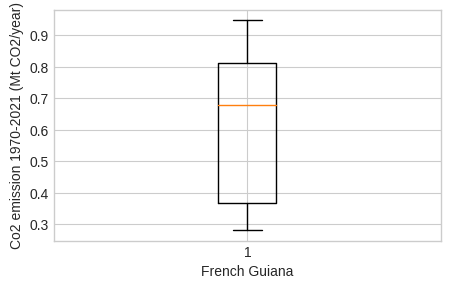

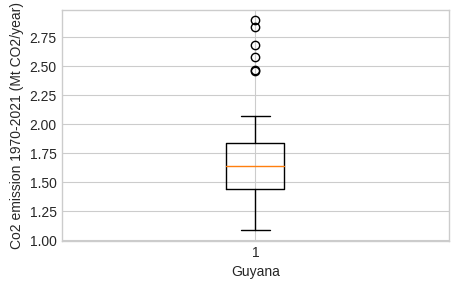

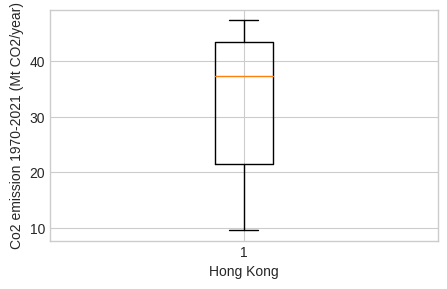

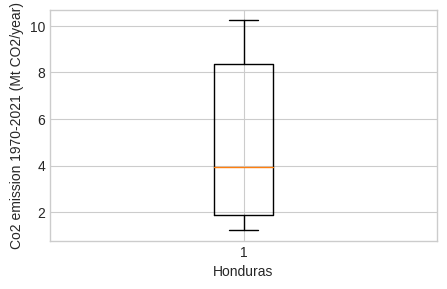

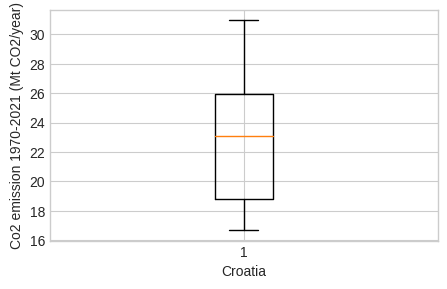

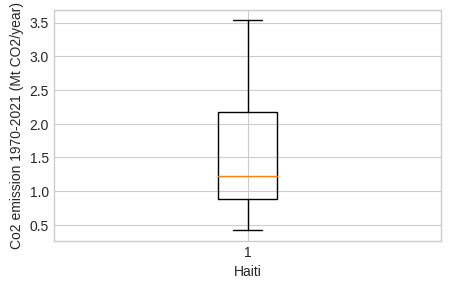

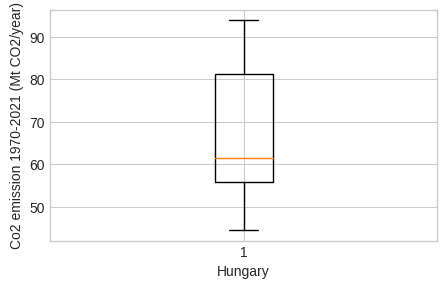

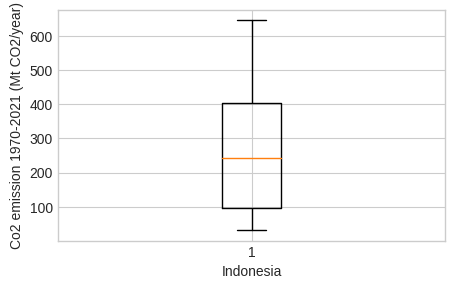

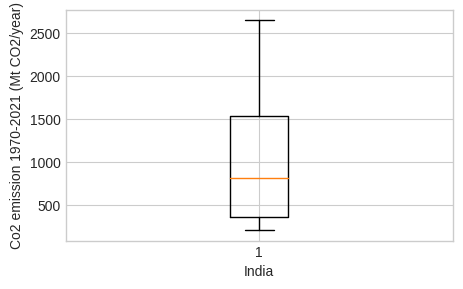

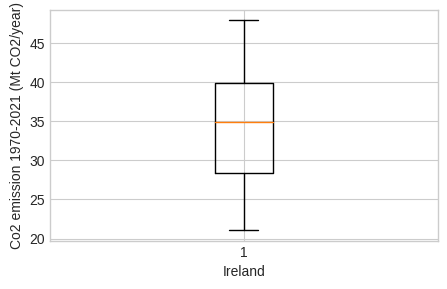

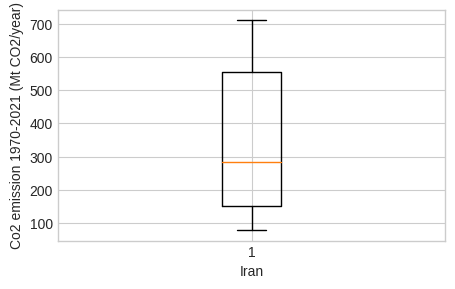

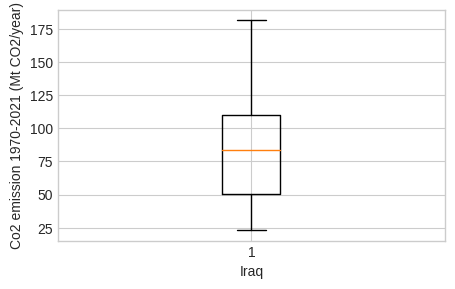

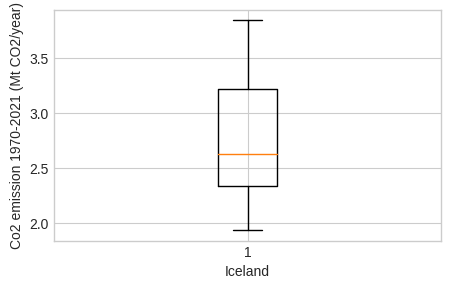

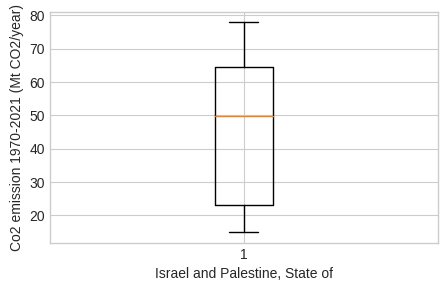

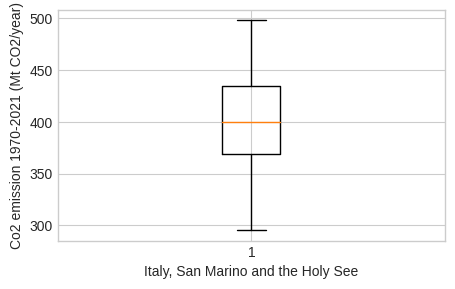

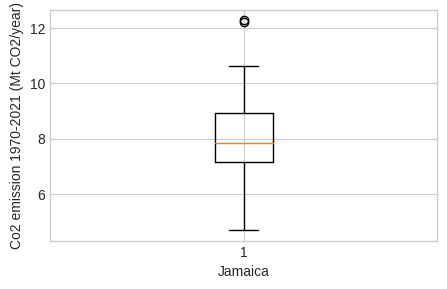

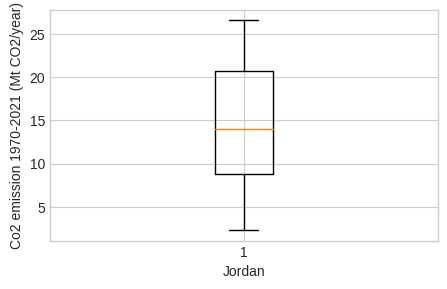

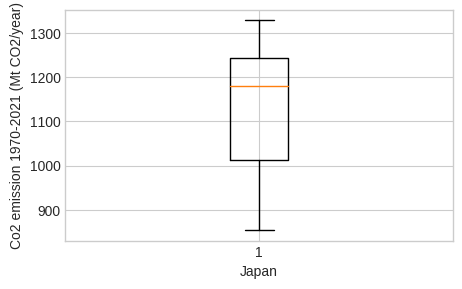

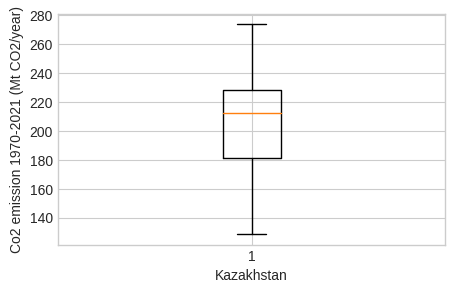

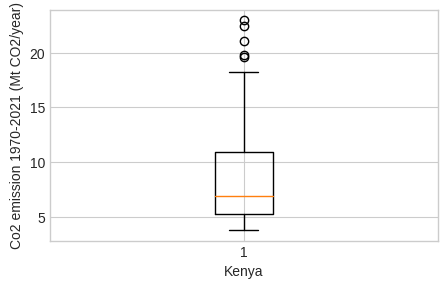

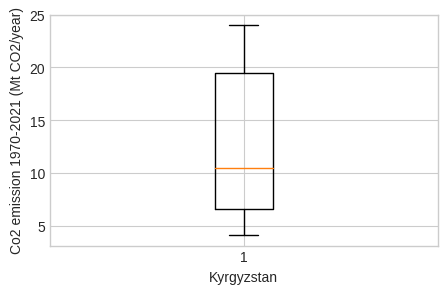

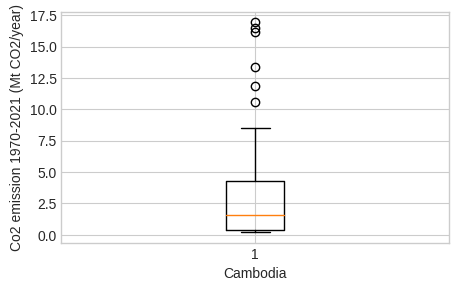

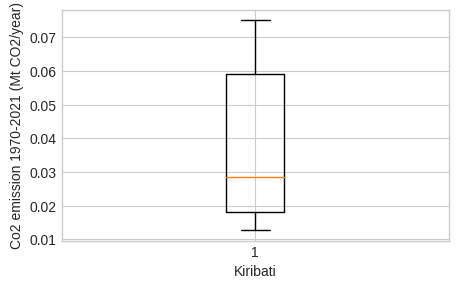

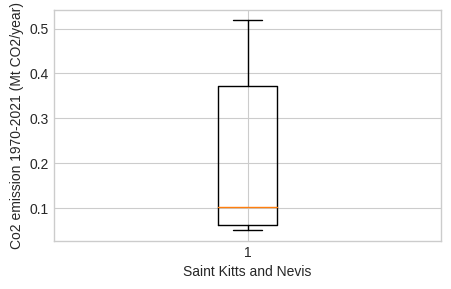

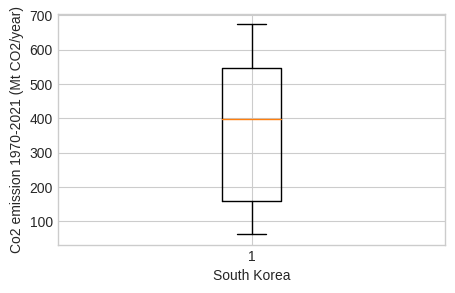

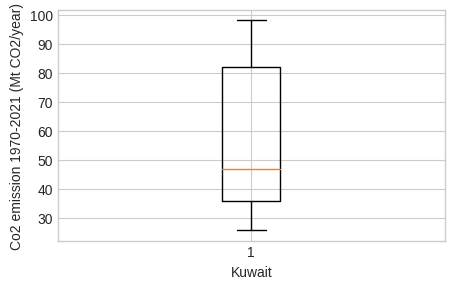

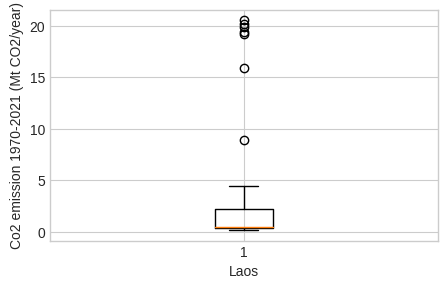

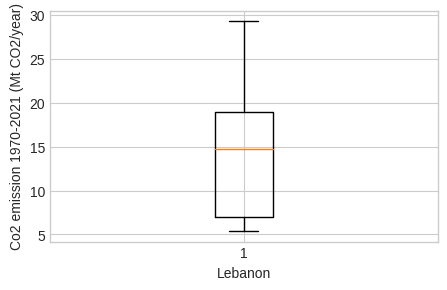

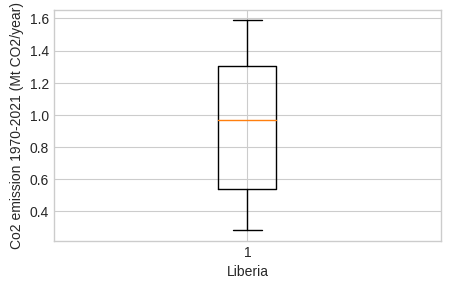

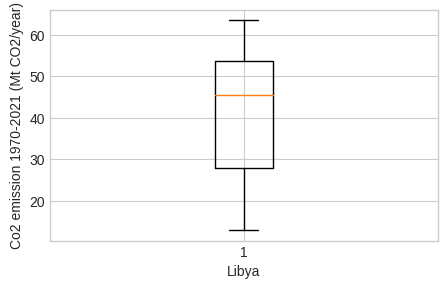

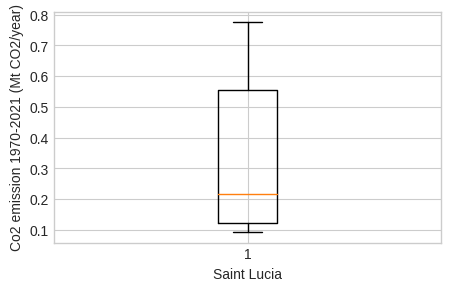

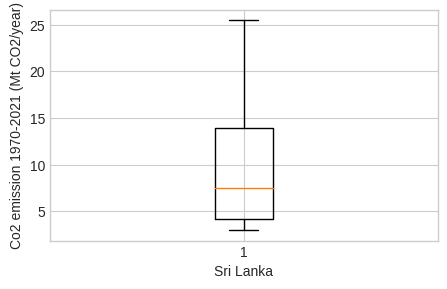

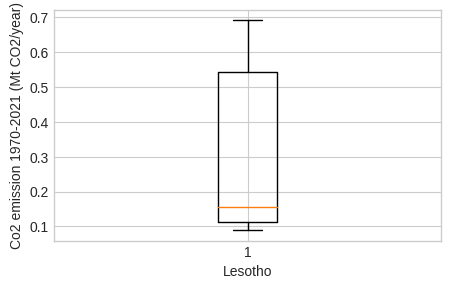

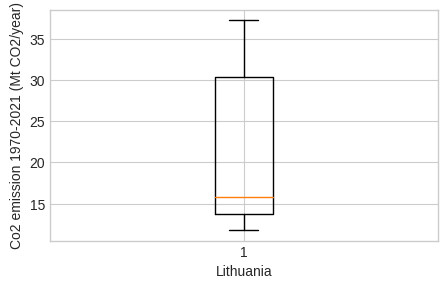

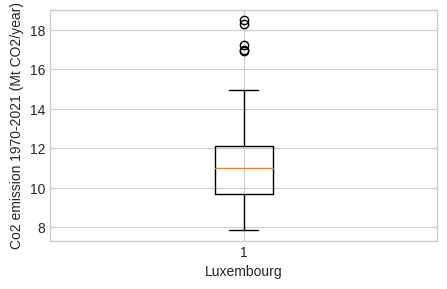

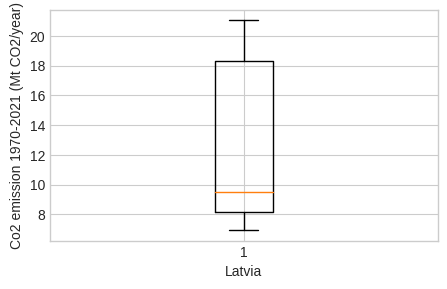

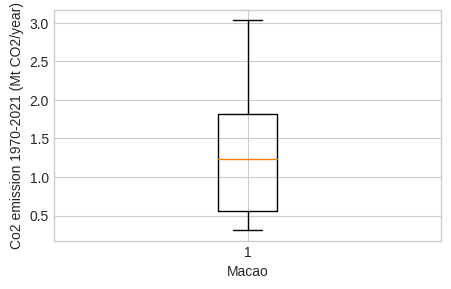

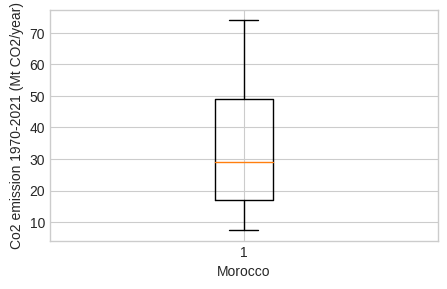

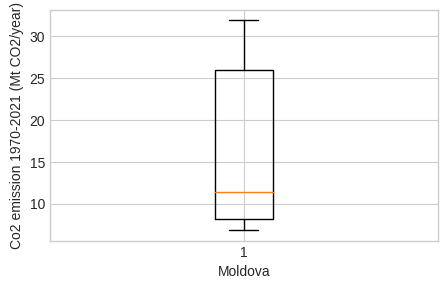

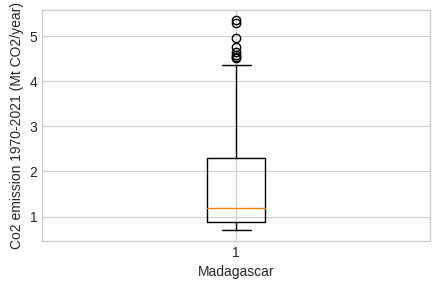

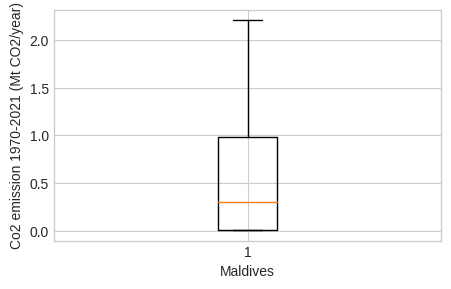

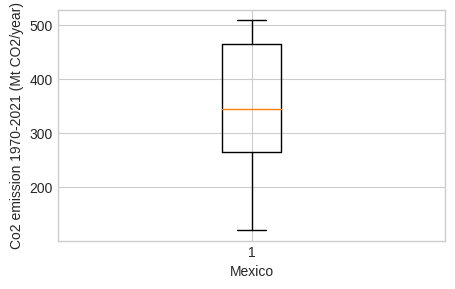

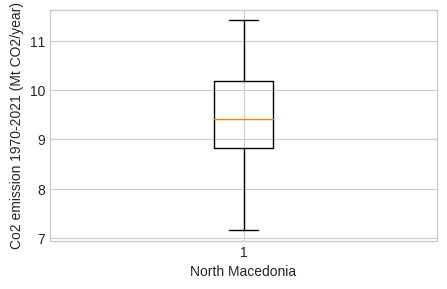

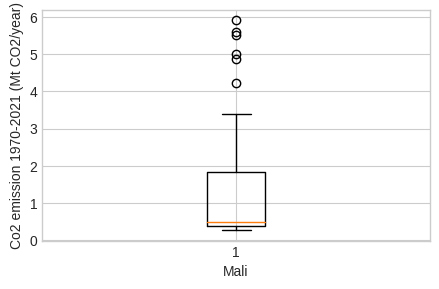

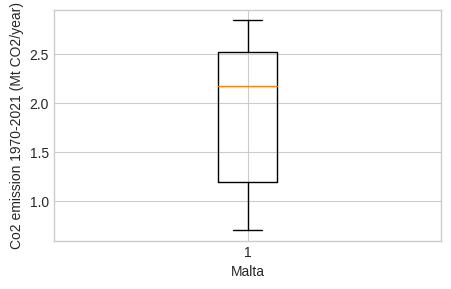

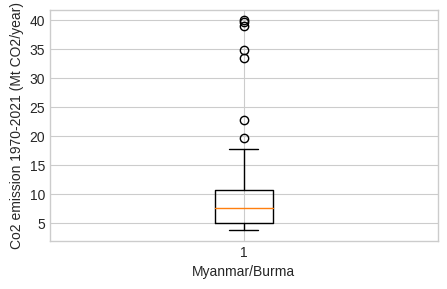

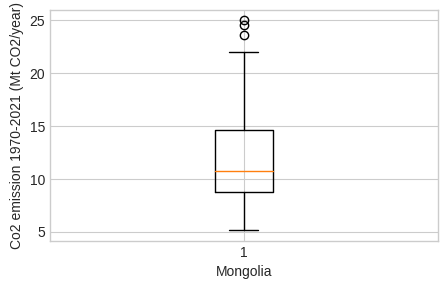

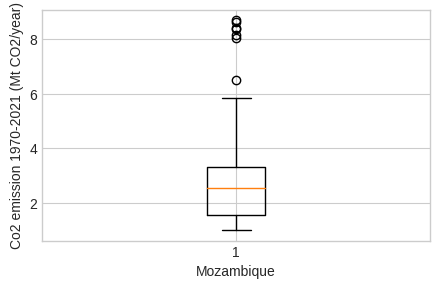

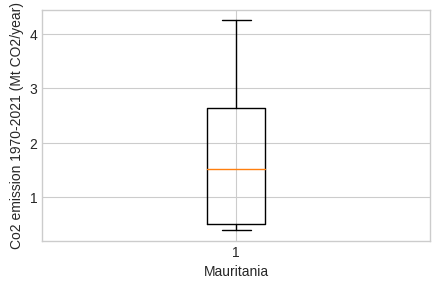

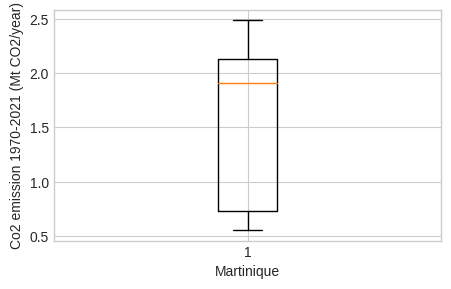

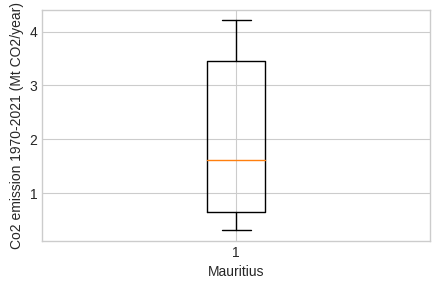

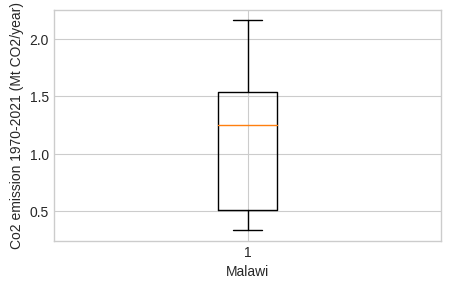

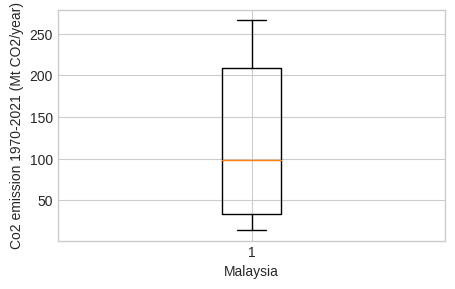

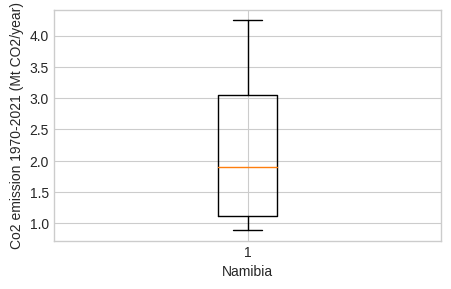

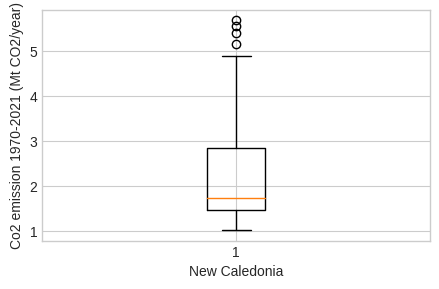

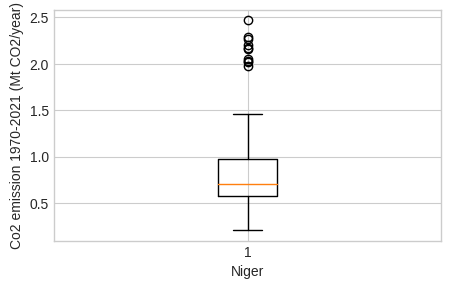

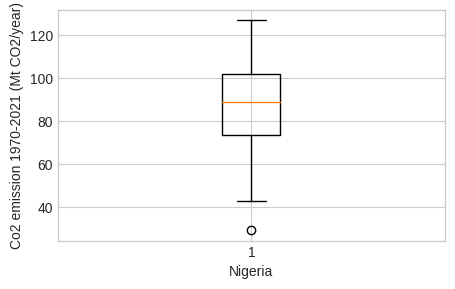

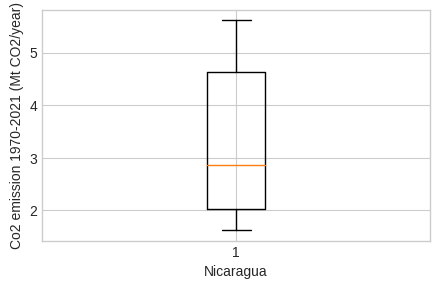

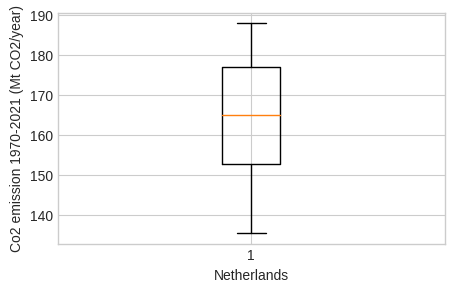

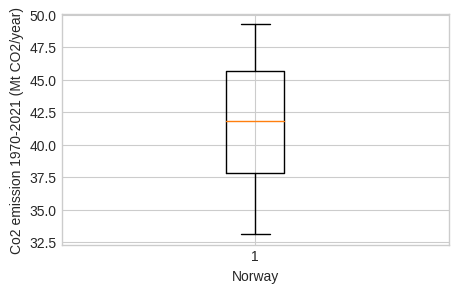

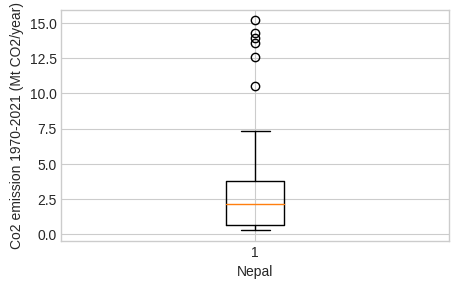

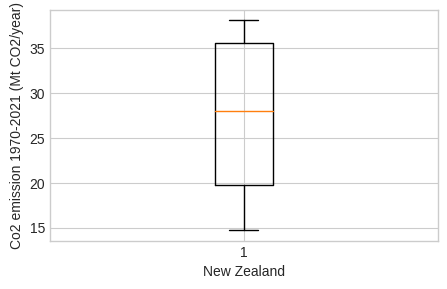

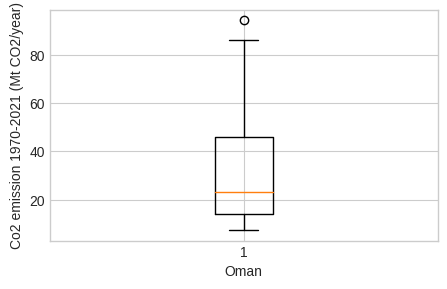

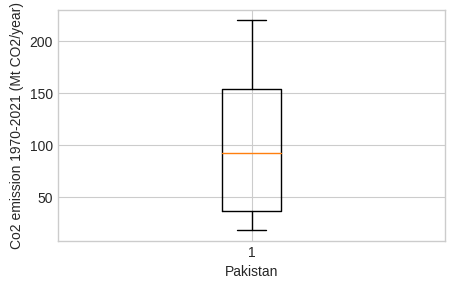

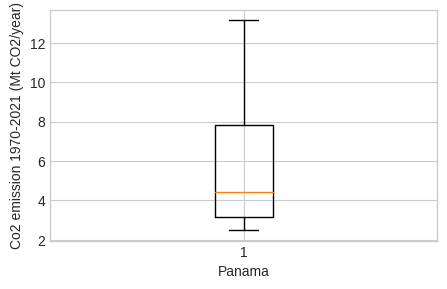

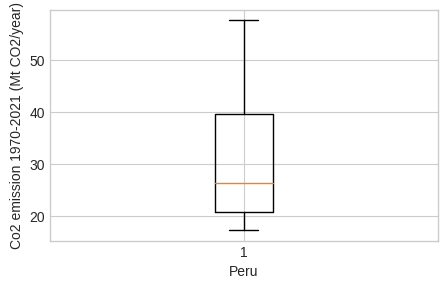

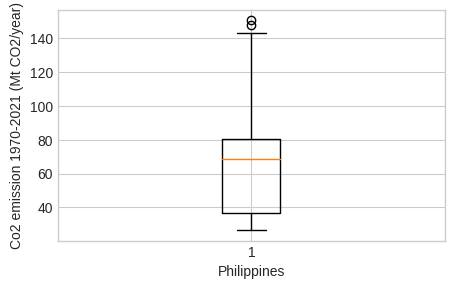

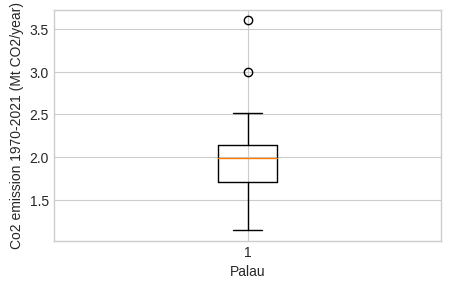

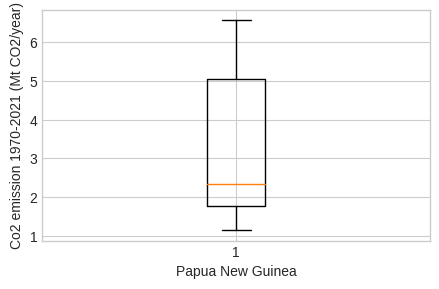

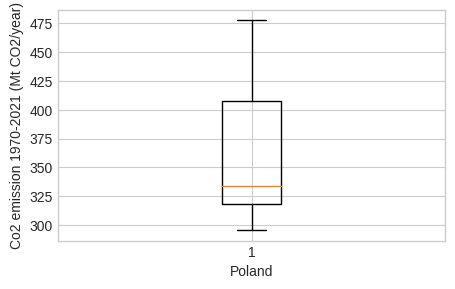

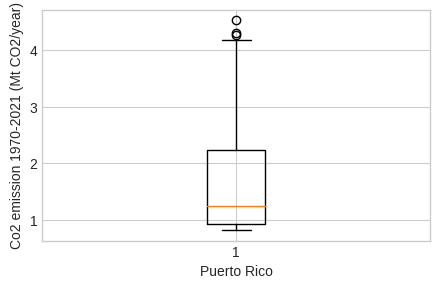

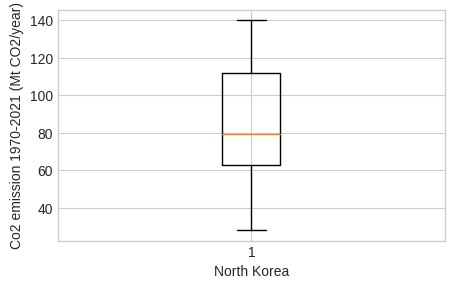

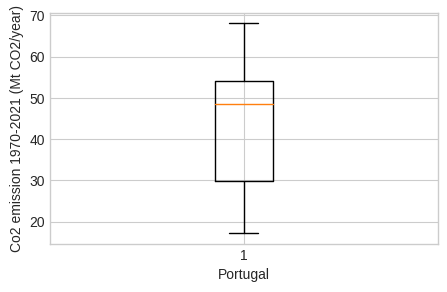

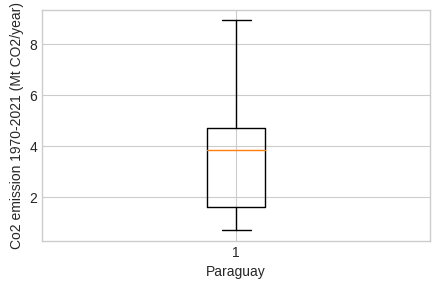

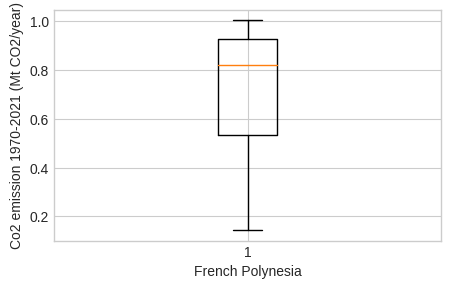

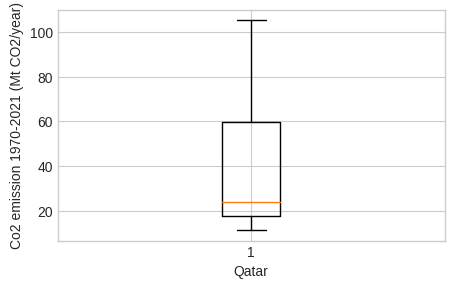

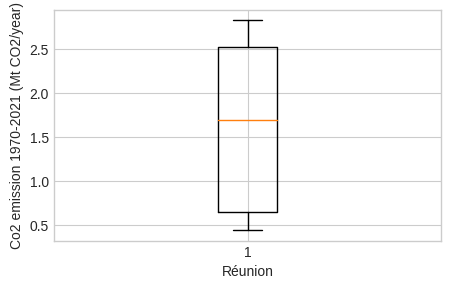

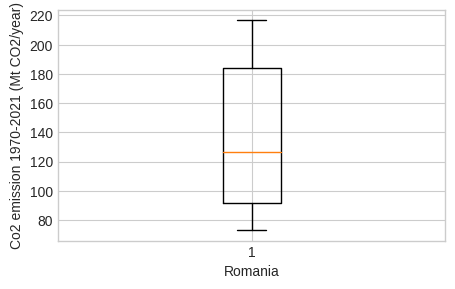

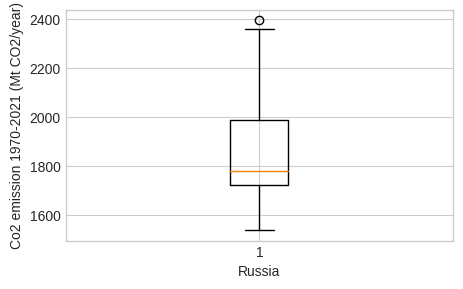

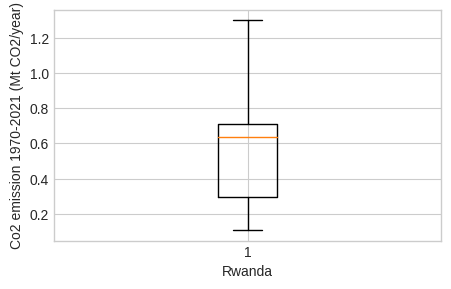

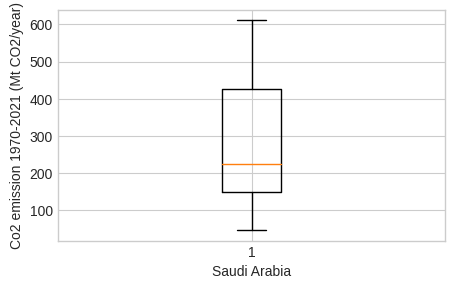

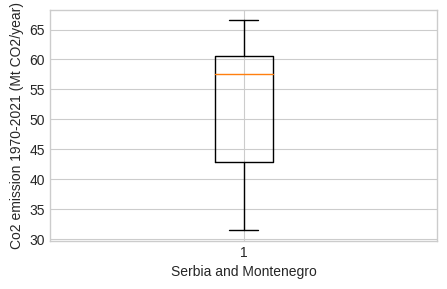

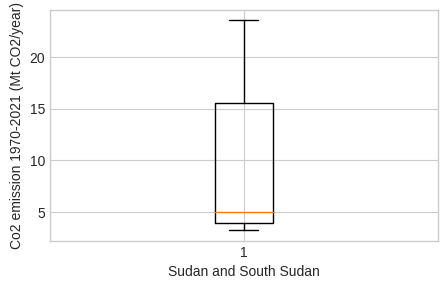

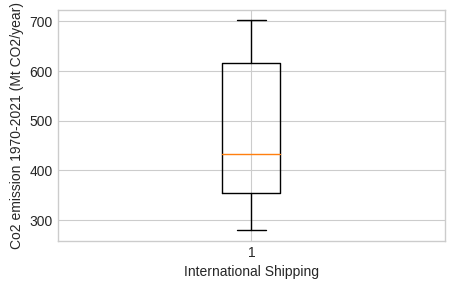

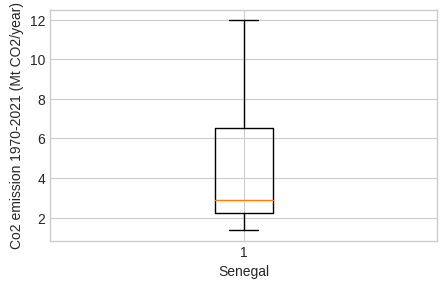

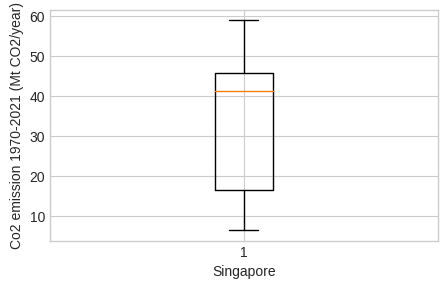

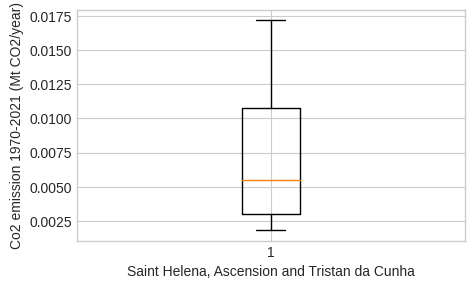

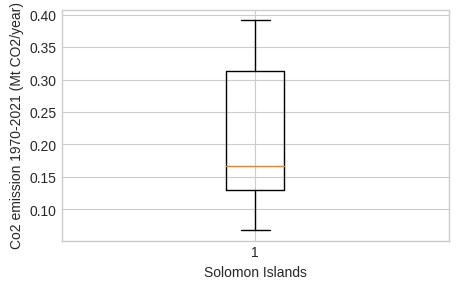

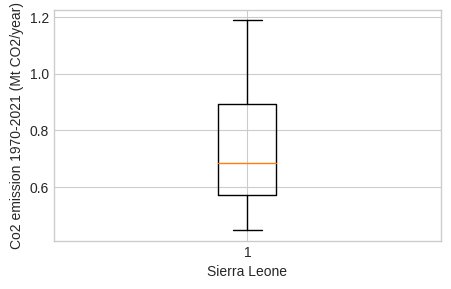

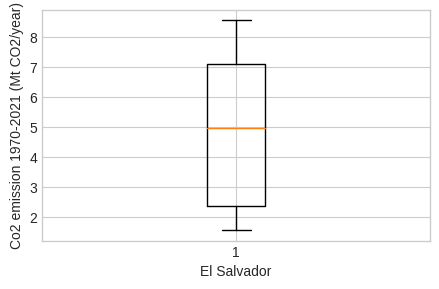

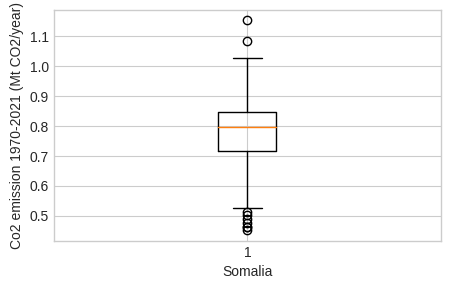

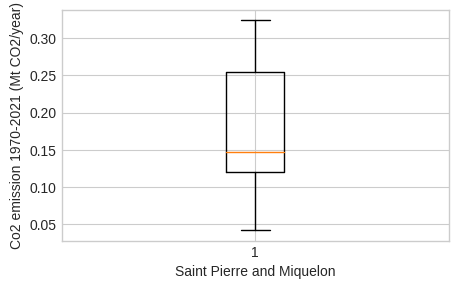

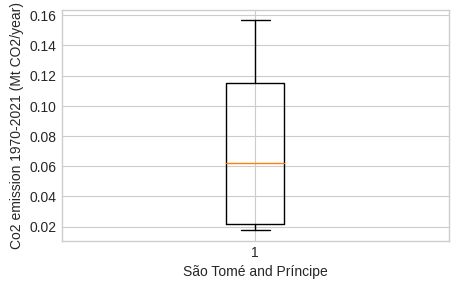

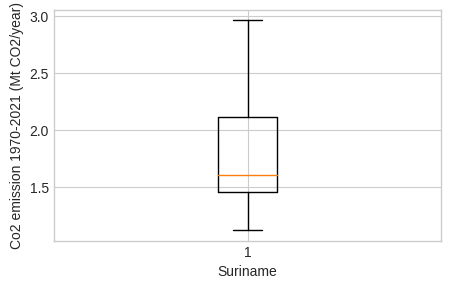

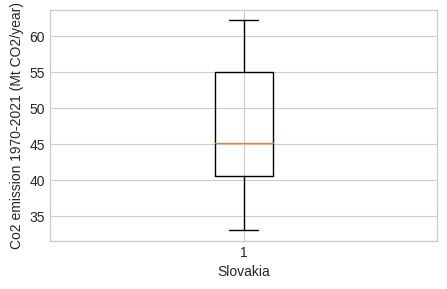

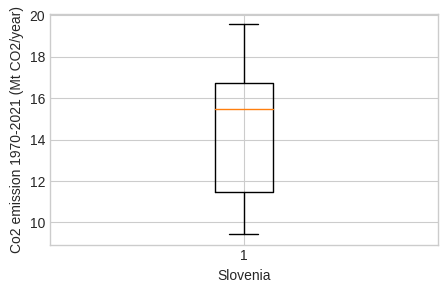

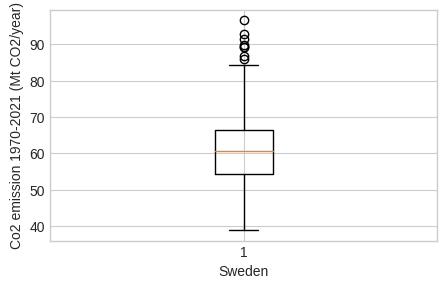

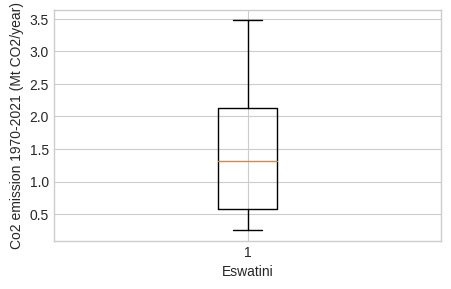

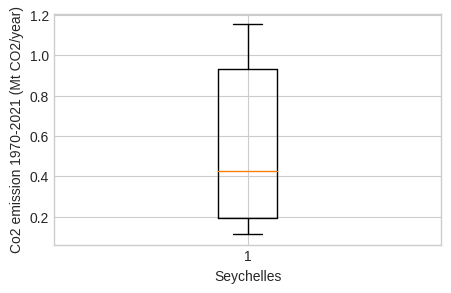

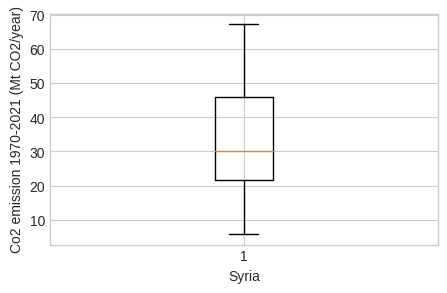

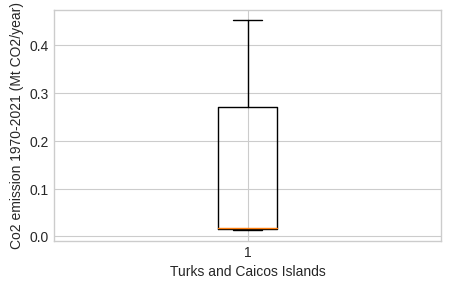

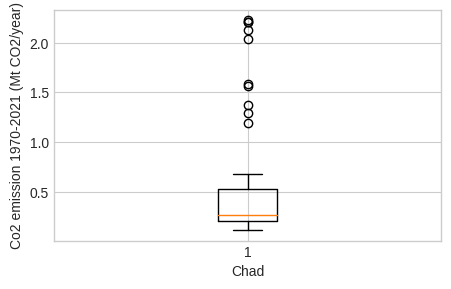

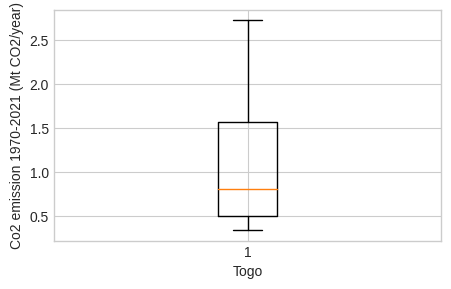

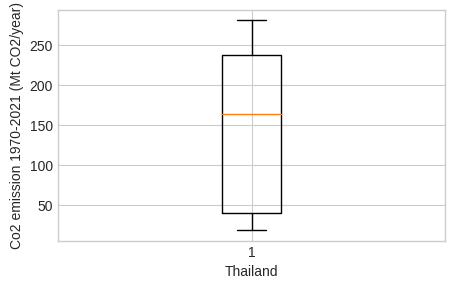

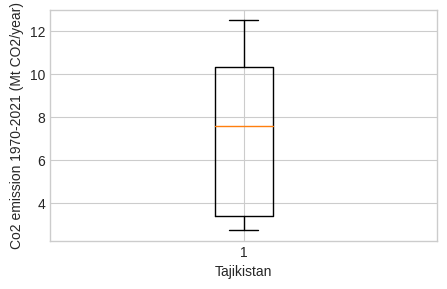

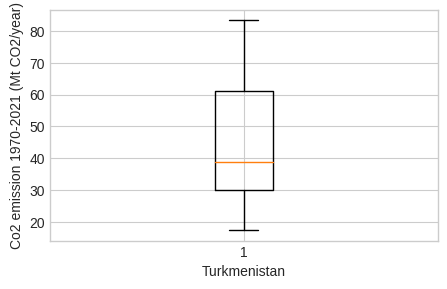

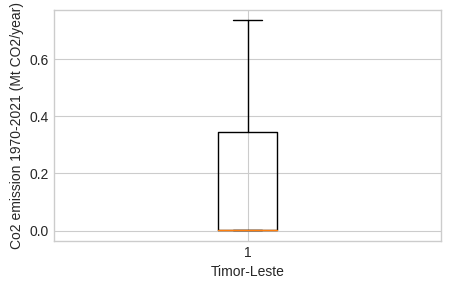

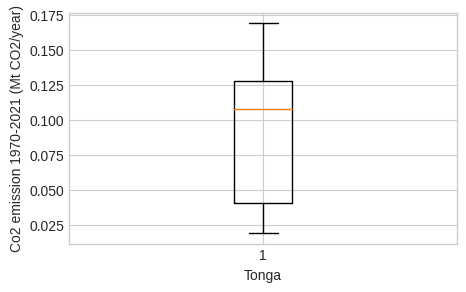

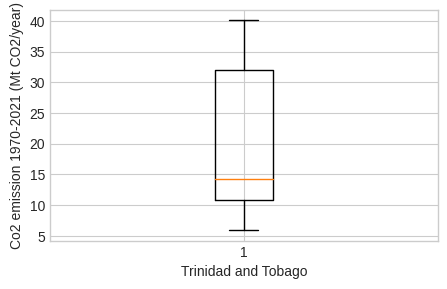

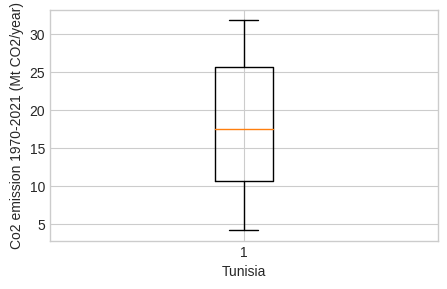

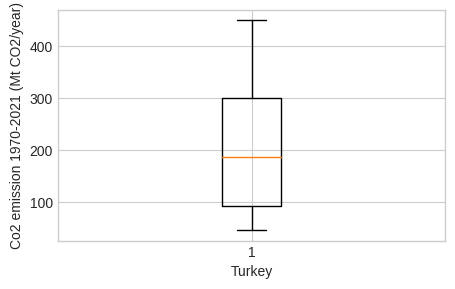

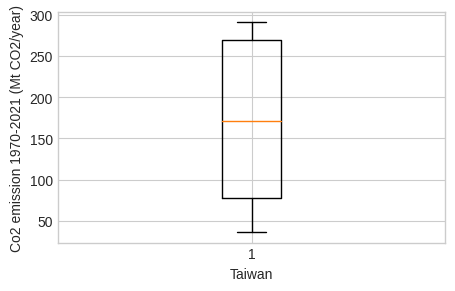

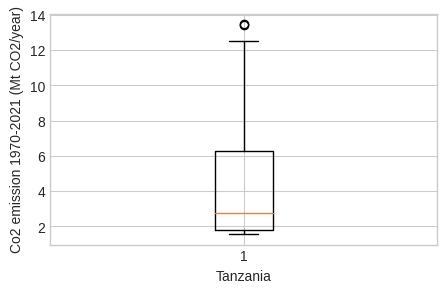

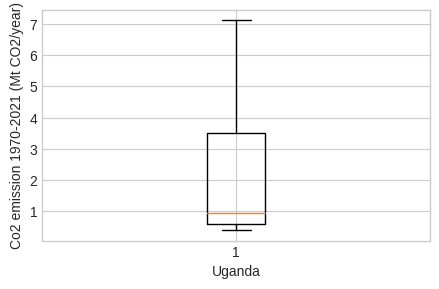

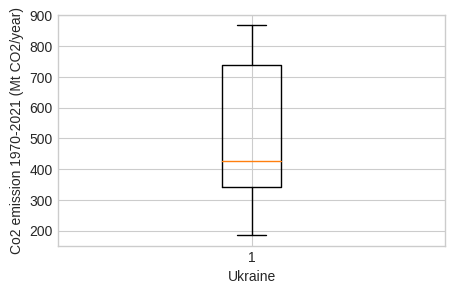

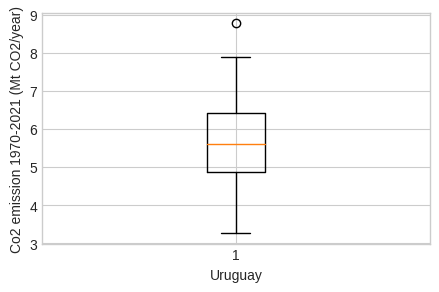

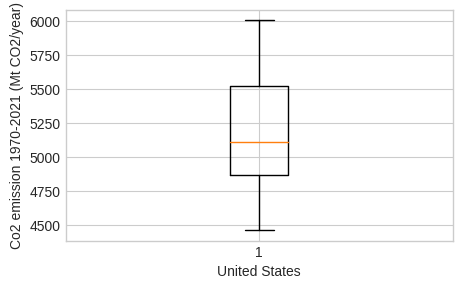

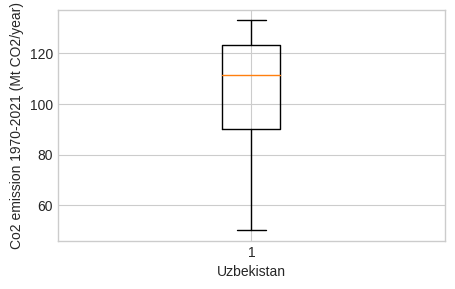

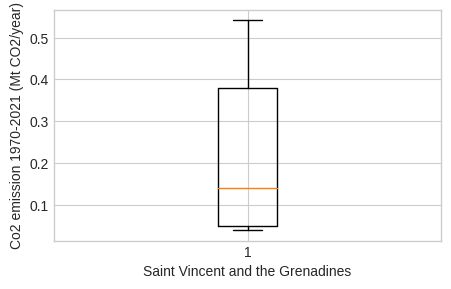

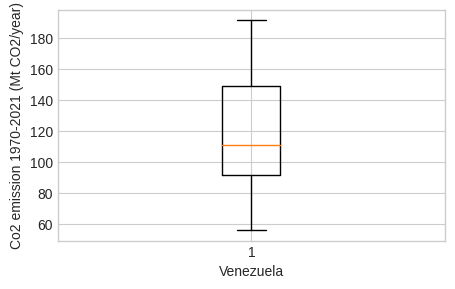

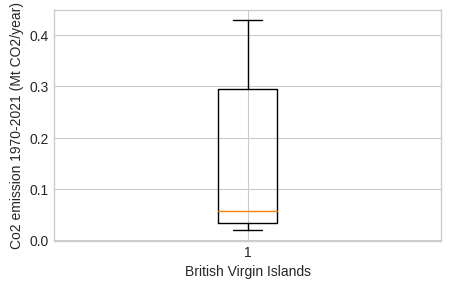

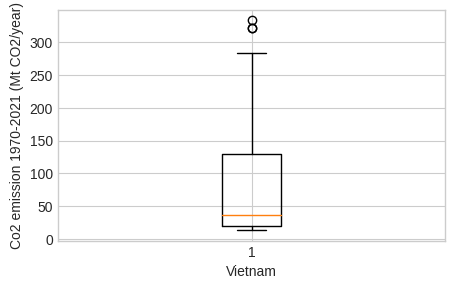

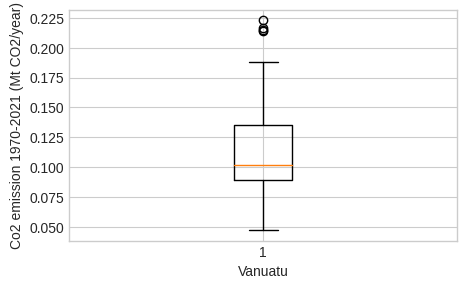

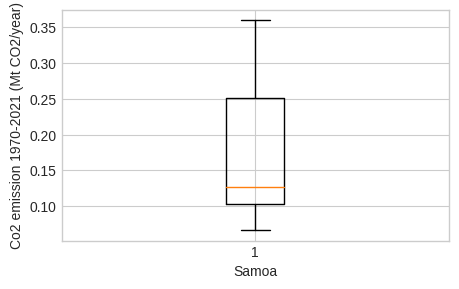

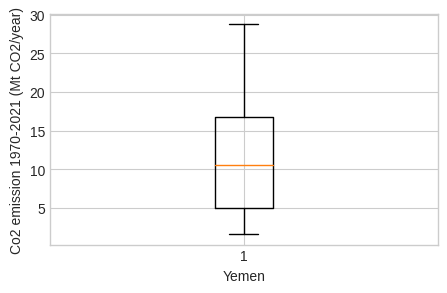

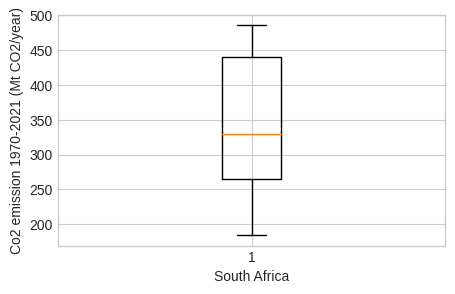

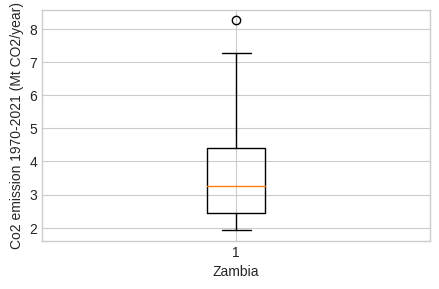

In [ ]:
for i in df_co2_final["Country"]:
  ir=df_co2_final[df_co2_final['Country']==i]
  ir=list(ir.iloc[0, 2:])

  fig = plt.figure(figsize =(5, 3))
  plt.boxplot(ir)
  plt.xlabel(i)
  plt.ylabel("Co2 emission 1970-2021 (Mt CO2/year)")
  plt.show

Gaussian Mixture Model of countries based on there CO2 emission overe the years (1970-2021)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
#from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


In [ ]:
scaled_df = StandardScaler().fit_transform(df_co2_final.loc[:,1970:2021])



Text(0.5, 1.0, 'Silhouette Score After K-Means Clustering')

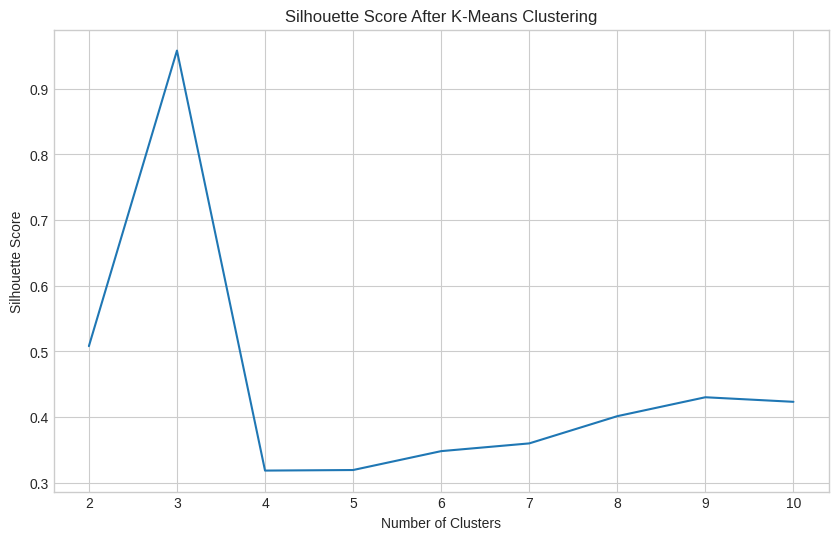

In [ ]:
silhouette_score={}
for k in range(2, 11):
  gm = GaussianMixture(n_components=k, random_state=0,covariance_type="diag").fit(scaled_df)
  silhouette_score[k] = metrics.silhouette_score(scaled_df, gm.predict(scaled_df), random_state=10, metric= 'euclidean')
plt.figure(figsize=(10,6))
plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score After K-Means Clustering")
#plt.xticks([i for i in range(2, 10)], rotation=75)

In [ ]:
gm3 = GaussianMixture(n_components=3, random_state=0,covariance_type="diag").fit(scaled_df)

In [ ]:
def get_country_names(labels):
  r=len(set(labels))
  country_clusters={}
  for index,value in enumerate(labels):
    if value not in country_clusters.keys():
      country_clusters[value]=[df_co2_final['Country'].iloc[index]]
    else:
      country_clusters[value].append(df_co2_final['Country'].iloc[index])



  return country_clusters

In [ ]:
y_pred3 = gm.predict(scaled_df)

In [ ]:
gmm_labels3=get_country_names(y_pred3 )
gmm_labels3

{0: ['Aruba',
  'Afghanistan',
  'Anguilla',
  'Antigua and Barbuda',
  'Burundi',
  'Benin',
  'Burkina Faso',
  'Bahamas',
  'Belize',
  'Bermuda',
  'Barbados',
  'Brunei',
  'Bhutan',
  'Botswana',
  'Central African Republic',
  'Democratic Republic of the Congo',
  'Congo',
  'Cook Islands',
  'Comoros',
  'Cabo Verde',
  'Costa Rica',
  'Cayman Islands',
  'Djibouti',
  'Dominica',
  'Eritrea',
  'Western Sahara',
  'Ethiopia',
  'Fiji',
  'Falkland Islands',
  'Faroes',
  'Gibraltar',
  'Guinea',
  'Guadeloupe',
  'The Gambia',
  'Guinea-Bissau',
  'Equatorial Guinea',
  'Grenada',
  'Greenland',
  'French Guiana',
  'Guyana',
  'Honduras',
  'Haiti',
  'Iceland',
  'Cambodia',
  'Kiribati',
  'Saint Kitts and Nevis',
  'Laos',
  'Liberia',
  'Saint Lucia',
  'Lesotho',
  'Macao',
  'Madagascar',
  'Maldives',
  'Mali',
  'Malta',
  'Mozambique',
  'Mauritania',
  'Martinique',
  'Mauritius',
  'Malawi',
  'Namibia',
  'New Caledonia',
  'Niger',
  'Nicaragua',
  'Nepal',
  'Pa

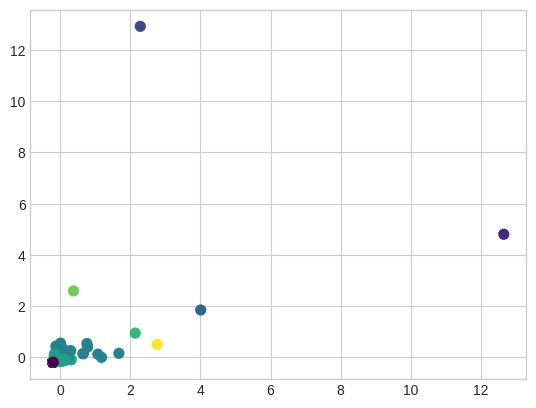

In [ ]:
plt.scatter(scaled_df[:, 0], scaled_df[:, 51], c=y_pred3,
            s=50, cmap='viridis')

##**Comparing the result of GMM and K-Mean Clustering**

In [ ]:
from sklearn.cluster import KMeans
silhouette_score_kmeans={}
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
  kmeans.fit(scaled_df)
  silhouette_score_kmeans[k] = metrics.silhouette_score(scaled_df, kmeans.labels_, random_state=10, metric= 'euclidean')

In [ ]:
Comparision= pd.DataFrame.from_dict({"clusters":[2,3,4,5,6,7,8,9,10], "K-means": list(silhouette_score_kmeans.values()), "GMM":list(silhouette_score.values())}, orient='index')
print("Comparision of silhouette_score for K-mean and GMM")
Comparision


Comparision of silhouette_score for K-mean and GMM


0         1         2         3         4         5  \
clusters  2.000000  3.000000  4.000000  5.000000  6.000000  7.000000   
K-means   0.964080  0.958023  0.888294  0.825352  0.820252  0.822497   
GMM       0.507806  0.958023  0.318256  0.319105  0.347887  0.359662   

                 6         7          8  
clusters  8.000000  9.000000  10.000000  
K-means   0.775614  0.693741   0.693552  
GMM       0.401149  0.429954   0.423007

From above we can see that the silhouette score for K-mean and GMM is same when cluters=3. As well as the countries falling in clusters are also the same. When we check for Cluster 4 K-means is performing better than the GMM and have better clustering division with silhouette score of 0.88.

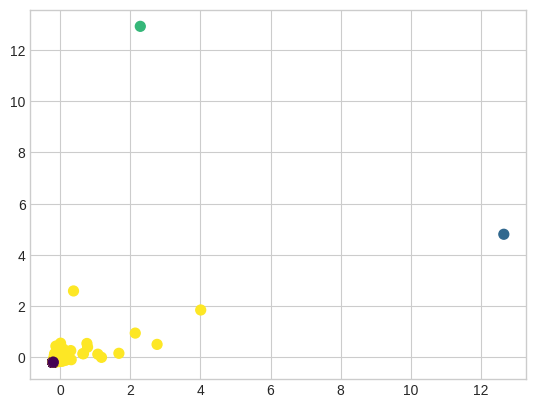

In [ ]:
gm_cluster4 = GaussianMixture(n_components=4, random_state=0,covariance_type="diag").fit(scaled_df)
y_pred4 = gm_cluster4.predict(scaled_df)
gmm_labels4=get_country_names(y_pred4 )
#gmm_labels4
plt.scatter(scaled_df[:, 0], scaled_df[:, 51], c=y_pred4,
            s=50, cmap='viridis')

Aggomerative ward clustering

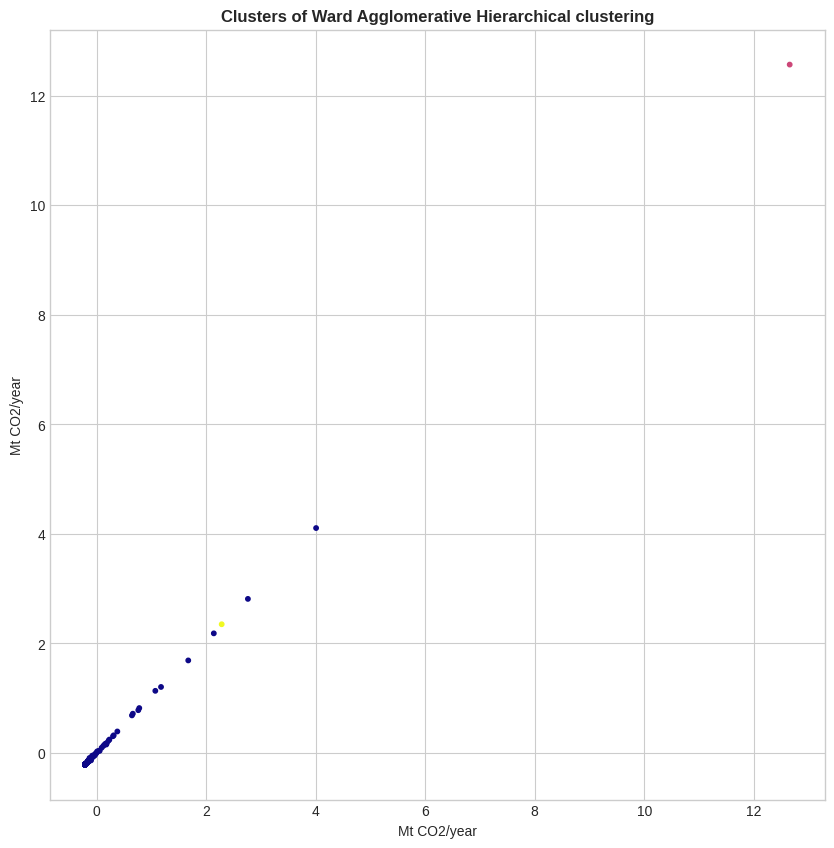

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering_ward = AgglomerativeClustering(linkage="ward", n_clusters=3).fit(scaled_df)
clustering_average = AgglomerativeClustering(linkage="average", n_clusters=3).fit(scaled_df)
#clustering.labels_
plt.figure(figsize=(10, 10))
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=clustering_ward.labels_, s=10, cmap='plasma')

# # Plot the centers of clusters
# plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red')

plt.title('Clusters of Ward Agglomerative Hierarchical clustering', fontweight="bold")
plt.xlabel('Mt CO2/year')
plt.ylabel('Mt CO2/year')
plt.show()


##**Spectral Clustering**

[(0,
  ['Aruba',
   'Anguilla',
   'Antigua and Barbuda',
   'Burundi',
   'Belize',
   'Bermuda',
   'Bhutan',
   'Central African Republic',
   'Cook Islands',
   'Comoros',
   'Cabo Verde',
   'Cayman Islands',
   'Djibouti',
   'Dominica',
   'Eritrea',
   'Western Sahara',
   'Falkland Islands',
   'Faroes',
   'Gibraltar',
   'The Gambia',
   'Guinea-Bissau',
   'Grenada',
   'Greenland',
   'French Guiana',
   'Kiribati',
   'Saint Kitts and Nevis',
   'Saint Lucia',
   'Lesotho',
   'Maldives',
   'Niger',
   'French Polynesia',
   'Rwanda',
   'Saint Helena, Ascension and Tristan da Cunha',
   'Solomon Islands',
   'Sierra Leone',
   'Somalia',
   'Saint Pierre and Miquelon',
   'São Tomé and Príncipe',
   'Seychelles',
   'Turks and Caicos Islands',
   'Chad',
   'Timor-Leste',
   'Tonga',
   'Saint Vincent and the Grenadines',
   'British Virgin Islands',
   'Vanuatu',
   'Samoa']),
 (1,
  ['Afghanistan',
   'Angola',
   'Albania',
   'Curaçao',
   'Armenia',
   'Benin',
   

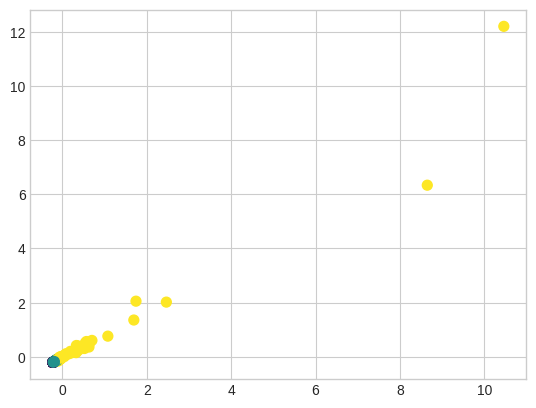

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels_spectral = model.fit_predict(scaled_df)
plt.scatter(scaled_df[:, 36], scaled_df[:, 41], c=labels_spectral,
            s=50, cmap='viridis');
labels_spectral
spectralCluster_country=get_country_names(labels_spectral)
r=sorted(spectralCluster_country.items())
r

In [ ]:
silhouette_score_Spectral=metrics.silhouette_score(scaled_df, labels_spectral, random_state=10, metric= 'euclidean')
print("Silhouette score for spectral clustering:",silhouette_score_Spectral)


Silhouette score for spectral clustering: -0.1104429292006921


Hence from above we can see that the clustering done by spectral clustering for cluster size 3 is not a good clustering as the silhouette score is -0.11. As the score is very close to zero hence we can even say that the clusters are overlapping.

Aravind's work ends here

In [ ]:
!pip install pandas scikit-learn tslearn

Devanshi's Work starts here

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.preprocessing import StandardScaler

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

<ipython-input-90-444997ff90a3>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
data_temp_country.head()

dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland

In [ ]:
df_Temp_1990_2012 = (
    data_temp_country
    .pipe(lambda x: x.assign(Year=pd.to_datetime(x.dt).dt.year))
    .query("Year >= 1990 and Year < 2013")
    [['Year', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country']]
)

In [ ]:
#data_crops_country
# group by country and Year to get min and max value for temp over year
df_Temp_min_max = df_Temp_1990_2012.groupby(['Country', 'Year'])

In [ ]:
df_Temp_min_max= df_Temp_min_max.agg(
    minTemp=('AverageTemperature', np.min),
    MaxTemp=('AverageTemperature', np.max)
).reset_index()

In [ ]:
df_Temp_avg = df_Temp_min_max.assign(
    avgTemp=(df_Temp_min_max["MaxTemp"] + df_Temp_min_max["minTemp"]) / 2
).reset_index()

df_Temp_avg

index      Country  Year  minTemp  MaxTemp  avgTemp
0         0  Afghanistan  1990    1.558   27.526  14.5420
1         1  Afghanistan  1991    1.168   27.230  14.1990
2         2  Afghanistan  1992    1.588   26.804  14.1960
3         3  Afghanistan  1993    0.808   26.826  13.8170
4         4  Afghanistan  1994    2.082   27.668  14.8750
...     ...          ...   ...      ...      ...      ...
5584   5584        Åland  2008    0.783   16.623   8.7030
5585   5585        Åland  2009   -2.544   16.423   6.9395
5586   5586        Åland  2010   -6.416   19.119   6.3515
5587   5587        Åland  2011   -6.390   18.003   5.8065
5588   5588        Åland  2012   -3.454   16.050   6.2980

[5589 rows x 6 columns]

In [ ]:
df_Temp_avg.isna().sum()

index       0
Country     0
Year        0
minTemp    23
MaxTemp    23
avgTemp    23
dtype: int64

In [ ]:
df_Temp_avg[df_Temp_avg.isna().any(axis=1)]

index     Country  Year  minTemp  MaxTemp  avgTemp
184    184  Antarctica  1990      NaN      NaN      NaN
185    185  Antarctica  1991      NaN      NaN      NaN
186    186  Antarctica  1992      NaN      NaN      NaN
187    187  Antarctica  1993      NaN      NaN      NaN
188    188  Antarctica  1994      NaN      NaN      NaN
189    189  Antarctica  1995      NaN      NaN      NaN
190    190  Antarctica  1996      NaN      NaN      NaN
191    191  Antarctica  1997      NaN      NaN      NaN
192    192  Antarctica  1998      NaN      NaN      NaN
193    193  Antarctica  1999      NaN      NaN      NaN
194    194  Antarctica  2000      NaN      NaN      NaN
195    195  Antarctica  2001      NaN      NaN      NaN
196    196  Antarctica  2002      NaN      NaN      NaN
197    197  Antarctica  2003      NaN      NaN      NaN
198    198  Antarctica  2004      NaN      NaN      NaN
199    199  Antarctica  2005      NaN      NaN      NaN
200    200  Antarctica  2006      NaN      NaN      NaN
201    201  Antarctica  2007      NaN      NaN      NaN
202    202  Antarctica  2008      NaN      NaN      NaN
203    203  Antarctica  2009      NaN      NaN      NaN
204    204  Antarctica  2010      NaN      NaN      NaN
205    205  Antarctica  2011      NaN      NaN      NaN
206    206  Antarctica  2012      NaN      NaN      NaN

In [ ]:
df_Temp_avg.dropna(inplace=True)

In [ ]:
df_Temp_avg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5566 entries, 0 to 5588
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    5566 non-null   int64  
 1   Country  5566 non-null   object 
 2   Year     5566 non-null   int64  
 3   minTemp  5566 non-null   float64
 4   MaxTemp  5566 non-null   float64
 5   avgTemp  5566 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 304.4+ KB


In [ ]:
df_Temp_avg.describe()

index         Year      minTemp      MaxTemp      avgTemp
count  5566.000000  5566.000000  5566.000000  5566.000000  5566.000000
mean   2804.739669  2001.000000    13.185390    25.060918    19.123154
std    1608.188395     6.633846    13.008747     6.178189     9.005004
min       0.000000  1990.000000   -35.423000    -2.619000   -18.429500
25%    1414.250000  1995.000000     2.588250    21.804250    11.373875
50%    2805.500000  2001.000000    18.346500    27.081000    22.868250
75%    4196.750000  2007.000000    24.804250    28.685000    26.665000
max    5588.000000  2012.000000    27.665000    38.842000    30.290000

In [ ]:
scaled_df = StandardScaler().fit_transform(df_Temp_avg.iloc[:,2:5])

###GMM Clustering

In [ ]:
# Convert categorical variables to dummy/indicator variables.
country_dummies = pd.get_dummies(df_Temp_avg['Country'])

# We won't use 'Year' for clustering here, as GMM won't handle it appropriately.
# However, you can extract some features from the years if needed.
df = pd.concat([country_dummies, df_Temp_avg[['minTemp', 'MaxTemp', 'avgTemp']]], axis=1)

# Scale your data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Fit the GMM
gmm = GaussianMixture(n_components=3)
gmm.fit(scaled_df)

# Predict the cluster for each data point
preds = gmm.predict(scaled_df)

# Add the predictions to your dataframe
df_Temp_avg['Cluster'] = preds
df_Temp_avg

index      Country  Year  minTemp  MaxTemp  avgTemp  Cluster
0         0  Afghanistan  1990    1.558   27.526  14.5420        0
1         1  Afghanistan  1991    1.168   27.230  14.1990        0
2         2  Afghanistan  1992    1.588   26.804  14.1960        0
3         3  Afghanistan  1993    0.808   26.826  13.8170        0
4         4  Afghanistan  1994    2.082   27.668  14.8750        0
...     ...          ...   ...      ...      ...      ...      ...
5584   5584        Åland  2008    0.783   16.623   8.7030        1
5585   5585        Åland  2009   -2.544   16.423   6.9395        1
5586   5586        Åland  2010   -6.416   19.119   6.3515        1
5587   5587        Åland  2011   -6.390   18.003   5.8065        1
5588   5588        Åland  2012   -3.454   16.050   6.2980        1

[5566 rows x 7 columns]

In [ ]:
y=len([i for i in preds if i==0])
print(y)

1472


In [ ]:
# plt.figure(figsize=(10, 10))
# plt.scatter(
#     pca_result[:, 0],
#     pca_result[:, 1],
#     c=df_Temp_avg["Cluster"],
#     alpha=0.5,
#     cmap="viridis",
# )
# plt.colorbar()
# plt.title("PCA Clustering Visualization")
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.show()

###Time Series Clustering

In [ ]:
# First, we need to reshape the data to fit the model, each series is a row and each year is a column
pivot_df = df_Temp_avg.pivot(index='Country', columns='Year', values='avgTemp')

# Now we need to scale the time series data
scaler = TimeSeriesScalerMeanVariance()
scaled_ts = scaler.fit_transform(pivot_df)

# Now we can cluster
km = TimeSeriesKMeans(n_clusters=3, metric="dtw")
labels = km.fit_predict(scaled_ts)

# Create a new dataframe for countries and their labels
countries_df = pivot_df.reset_index()[['Country']]  # reset_index to convert 'Country' from index to a column
countries_df['Cluster'] = labels

# Merge the original DataFrame with the labels
df_Temp_avg = pd.merge(df_Temp_avg, countries_df, on='Country', how='left')

print(df_Temp_avg)

      index      Country  Year  minTemp  MaxTemp  avgTemp  Cluster_x  \
0         0  Afghanistan  1990    1.558   27.526  14.5420          0   
1         1  Afghanistan  1991    1.168   27.230  14.1990          0   
2         2  Afghanistan  1992    1.588   26.804  14.1960          0   
3         3  Afghanistan  1993    0.808   26.826  13.8170          0   
4         4  Afghanistan  1994    2.082   27.668  14.8750          0   
...     ...          ...   ...      ...      ...      ...        ...   
5561   5584        Åland  2008    0.783   16.623   8.7030          1   
5562   5585        Åland  2009   -2.544   16.423   6.9395          1   
5563   5586        Åland  2010   -6.416   19.119   6.3515          1   
5564   5587        Åland  2011   -6.390   18.003   5.8065          1   
5565   5588        Åland  2012   -3.454   16.050   6.2980          1   

      Cluster_y  
0             1  
1             1  
2             1  
3             1  
4             1  
...         ...  
5561     

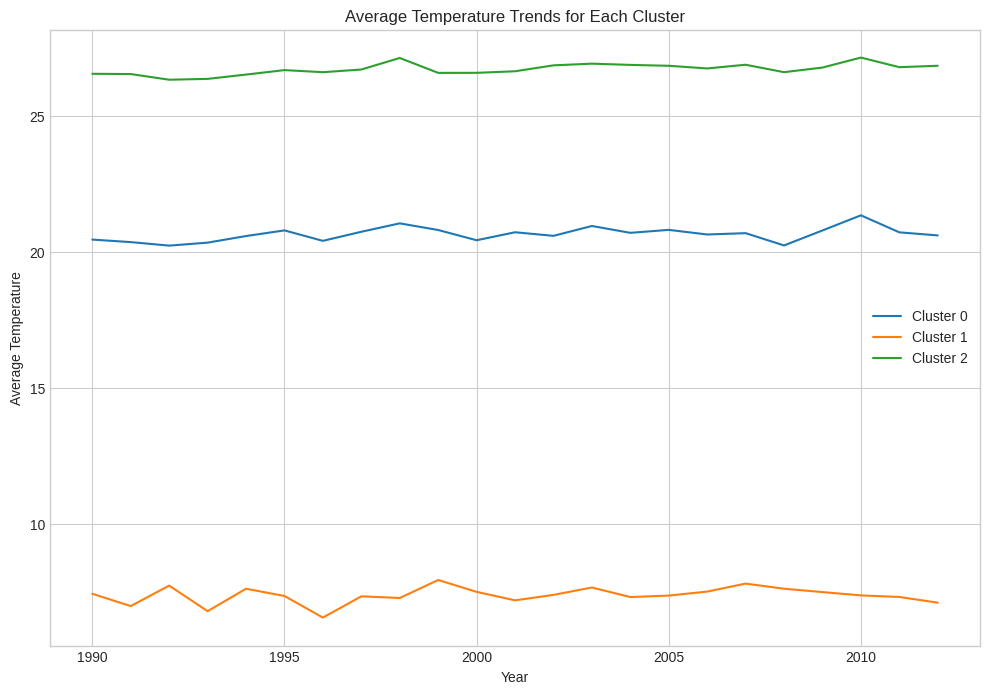

In [ ]:
clusters = df_Temp_avg["Cluster_x"].unique()

plt.figure(figsize=(12, 8))

# For each cluster
for cluster in clusters:
    # Filter the data to only include countries in the current cluster
    cluster_data = df_Temp_avg[df_Temp_avg["Cluster_x"] == cluster]

    # Calculate the average temperature for each year in this cluster
    avg_temps = cluster_data.groupby("Year")["avgTemp"].mean()

    # Plot the average temperatures
    plt.plot(avg_temps.index, avg_temps.values, label=f"Cluster {cluster}")

# Add a legend and show the plot
plt.xlabel("Year")
plt.ylabel("Average Temperature")
plt.title("Average Temperature Trends for Each Cluster")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Create a new dataframe for countries and their labels
countries_df = pivot_df.reset_index()[['Country']]  # reset_index to convert 'Country' from index to a column
countries_df['Cluster'] = labels

print(countries_df)

Year         Country  Cluster
0        Afghanistan        1
1             Africa        0
2            Albania        2
3            Algeria        0
4     American Samoa        2
..               ...      ...
237   Western Sahara        2
238            Yemen        0
239           Zambia        1
240         Zimbabwe        1
241            Åland        1

[242 rows x 2 columns]


In [ ]:
# Merge the original DataFrame with the labels
df_Temp_avg = pd.merge(df_Temp_avg, countries_df, on='Country', how='left')

print(df_Temp_avg)

      index      Country  Year  minTemp  MaxTemp  avgTemp  Cluster_x  \
0         0  Afghanistan  1990    1.558   27.526  14.5420          0   
1         1  Afghanistan  1991    1.168   27.230  14.1990          0   
2         2  Afghanistan  1992    1.588   26.804  14.1960          0   
3         3  Afghanistan  1993    0.808   26.826  13.8170          0   
4         4  Afghanistan  1994    2.082   27.668  14.8750          0   
...     ...          ...   ...      ...      ...      ...        ...   
5561   5584        Åland  2008    0.783   16.623   8.7030          1   
5562   5585        Åland  2009   -2.544   16.423   6.9395          1   
5563   5586        Åland  2010   -6.416   19.119   6.3515          1   
5564   5587        Åland  2011   -6.390   18.003   5.8065          1   
5565   5588        Åland  2012   -3.454   16.050   6.2980          1   

      Cluster_y  Cluster  
0             1        1  
1             1        1  
2             1        1  
3             1        1  


###K-Means Clustering

In [ ]:
from sklearn import cluster
def get_country_names(labels):
  r=len(set(labels))
  country_clusters={}
  for index,value in enumerate(labels):
    if value not in country_clusters.keys():
      country_clusters[value]=[df_co2_final['Country'].iloc[index]]
    else:
      country_clusters[value].append(df_co2_final['Country'].iloc[index])



  return country_clusters

In [ ]:
# Drop non-numeric columns
numeric_cols_df = df_Temp_avg.drop(['index', 'Country', 'Year'], axis=1)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols_df)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_data)

# Add the cluster labels to the original DataFrame
df_Temp_avg['Cluster_KMeans'] = kmeans.labels_

print(df_Temp_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      index      Country  Year  minTemp  MaxTemp  avgTemp  Cluster_x  \
0         0  Afghanistan  1990    1.558   27.526  14.5420          0   
1         1  Afghanistan  1991    1.168   27.230  14.1990          0   
2         2  Afghanistan  1992    1.588   26.804  14.1960          0   
3         3  Afghanistan  1993    0.808   26.826  13.8170          0   
4         4  Afghanistan  1994    2.082   27.668  14.8750          0   
...     ...          ...   ...      ...      ...      ...        ...   
5561   5584        Åland  2008    0.783   16.623   8.7030          1   
5562   5585        Åland  2009   -2.544   16.423   6.9395          1   
5563   5586        Åland  2010   -6.416   19.119   6.3515          1   
5564   5587        Åland  2011   -6.390   18.003   5.8065          1   
5565   5588        Åland  2012   -3.454   16.050   6.2980          1   

      Cluster_y  Cluster  Cluster_KMeans  
0             1        1               1  
1             1        1               1  
2     

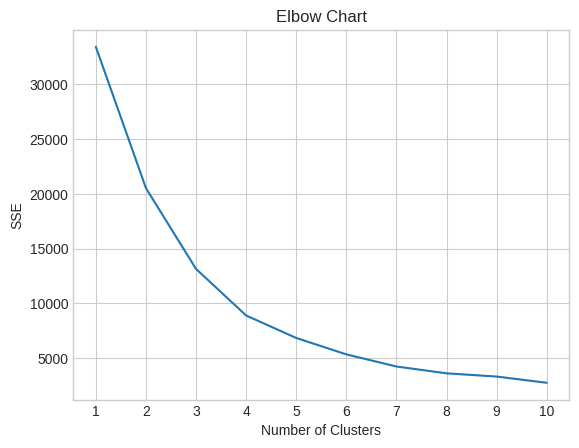

In [ ]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)
#df_co2_final.loc[:,1970:2021]
#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Chart")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_data)
y_kmeans = kmeans.predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


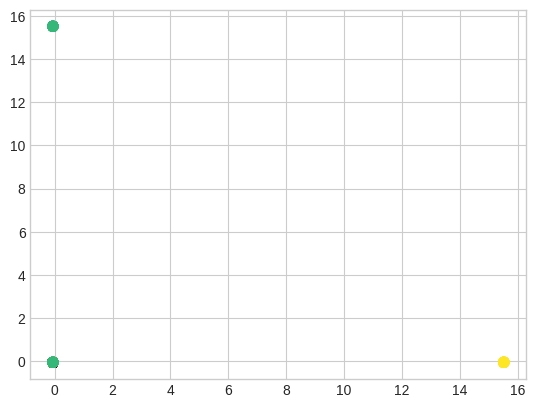

In [ ]:
def plot_scatter(df1, df2, labels):
    plt.scatter(df1, df2, c=labels, s=50, cmap="viridis")
    plt.show()


plot_scatter(scaled_df[:, 0], scaled_df[:, 51], y_kmeans)

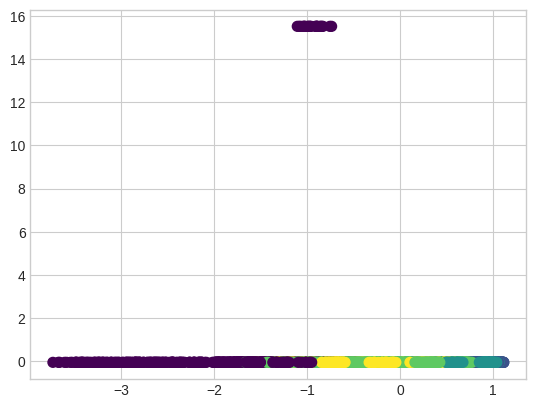

In [ ]:
kmeans_5cluster = KMeans(n_clusters=5, n_init=10)
kmeans_5cluster.fit(scaled_data)
y_kmeans_5cluster = kmeans_5cluster.predict(scaled_data)
plot_scatter(scaled_data[:, 0],scaled_df[:, 51],y_kmeans_5cluster)

In [ ]:
# add all lib imports here
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

<ipython-input-115-13e28ce2644a>:22: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
#data_temp_country = pd.read_csv("/content/sample_data/GlobalLandTemperaturesByCountry.csv") # till Aug 2013

In [ ]:

df_Temp_1990_2012 = (
    data_temp_country
    .pipe(lambda x: x.assign(Year=pd.to_datetime(x.dt).dt.year))
    .query("Year >= 1970 and Year < 2013")
    [['Year', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country']]
)

In [ ]:
df_Temp_1990_2012

Year  AverageTemperature  AverageTemperatureUncertainty   Country
2714    1970              -6.495                          0.584     Åland
2715    1970             -10.835                          0.478     Åland
2716    1970              -1.583                          0.608     Åland
2717    1970               0.493                          0.463     Åland
2718    1970               6.939                          0.565     Åland
...      ...                 ...                            ...       ...
577448  2012              18.946                          1.127  Zimbabwe
577449  2012              22.609                          0.643  Zimbabwe
577450  2012              23.482                          0.574  Zimbabwe
577451  2012              24.606                          0.532  Zimbabwe
577452  2012              24.111                          0.846  Zimbabwe

[125388 rows x 4 columns]

In [ ]:
df_Temp_avg= df_Temp_1990_2012.groupby(['Country', 'Year'])[['AverageTemperature']].mean().unstack(level=0)

In [ ]:
df_Temp_avg = df_Temp_avg['AverageTemperature']

In [ ]:
# df_Temp_avg = df_Temp_min_max.agg(
#     avgTemp=(np.sum/np.count)
# ).reset_index()

#df_Temp_avg

Transpose the data so that the Years are the columns

In [ ]:
df_Temp_avg=df_Temp_avg.T
df_Temp_avg.reset_index(inplace=True)

Drop Missing Values

In [ ]:
df_Temp_avg[df_Temp_avg.isna().any(axis=1)]

Year     Country  1970  1971  1972  1973  1974  1975  1976  1977  1978  ...  \
8     Antarctica   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

Year  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  
8      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[1 rows x 44 columns]

In [ ]:
df_Temp_avg.dropna(inplace=True)

In [ ]:
df_Temp_avg.describe()

Year         1970        1971        1972        1973        1974        1975  \
count  242.000000  242.000000  242.000000  242.000000  242.000000  242.000000   
mean    18.794121   18.588207   18.665612   18.873293   18.631447   18.746662   
std      9.306184    9.084674    9.235529    9.279602    8.998934    8.973645   
min    -18.738167  -19.710500  -18.818000  -19.273583  -18.205667  -19.524917   
25%     10.963708   10.720167   10.640021   10.563458   10.806188   10.981646   
50%     23.015542   22.663417   22.766458   23.036292   22.629458   22.696875   
75%     26.412521   25.962500   26.327000   26.490167   26.052792   26.041708   
max     28.989250   28.609333   29.089083   29.114583   28.467333   28.697833   

Year         1976        1977        1978        1979  ...        2003  \
count  242.000000  242.000000  242.000000  242.000000  ...  242.000000   
mean    18.482197   18.922261   18.729517   18.909544  ...   19.525087   
std      9.165572    9.191682    9.349662    9.319875  ...    9.094895   
min    -18.025333  -18.150250  -18.448083  -18.585000  ...  -16.256250   
25%     10.511500   11.056042   10.383542   10.819958  ...   11.617563   
50%     22.691417   23.116458   22.945292   23.179542  ...   23.456125   
75%     26.003083   26.431771   26.452854   26.505542  ...   27.020708   
max     28.716000   29.019417   29.063250   29.035833  ...   29.757833   

Year         2004        2005        2006        2007        2008        2009  \
count  242.000000  242.000000  242.000000  242.000000  242.000000  242.000000   
mean    19.422092   19.499590   19.539135   19.610394   19.423962   19.546385   
std      9.072579    9.124147    8.968938    8.918831    8.888759    9.070230   
min    -17.301167  -16.151250  -17.114333  -17.074167  -17.389917  -17.316417   
25%     11.247833   11.265667   11.436313   12.040125   11.802208   11.732583   
50%     23.436833   23.571042   23.520833   23.578000   23.478208   23.380458   
75%     26.861042   27.080833   27.009646   26.959646   26.669542   26.977750   
max     29.540917   29.808583   29.777417   29.786333   29.339250   29.896750   

Year         2010        2011        2012  
count  242.000000  242.000000  242.000000  
mean    19.629806   19.456040   19.468744  
std      9.273418    8.950056    9.047003  
min    -15.546333  -17.174333  -16.772250  
25%     11.372021   11.756979   11.644333  
50%     23.895417   23.465917   23.377125  
75%     27.173896   26.768333   26.984188  
max     30.127083   29.844333   29.923583  

[8 rows x 43 columns]

In [ ]:
df_Temp_avg

Year         Country       1970       1971       1972       1973       1974  \
0        Afghanistan  14.783083  14.823500  12.547167  14.235500  13.316750   
1             Africa  24.321583  23.933083  24.199083  24.400083  23.830417   
2            Albania  12.839667  12.534417  12.608250  12.486667  12.559833   
3            Algeria  23.322833  22.672250  22.698167  22.886167  22.541000   
4     American Samoa  26.760667  26.402250  26.812333  27.138250  26.591250   
..               ...        ...        ...        ...        ...        ...   
238   Western Sahara  22.981500  21.850417  21.389250  22.491500  21.965583   
239            Yemen  26.375917  26.028333  26.486500  26.278833  26.097333   
240           Zambia  21.631333  21.190333  21.401083  21.479167  20.784250   
241         Zimbabwe  21.798750  21.160250  21.031583  21.460417  20.558250   
242            Åland   4.442833   5.623750   6.358333   6.198083   6.766917   

Year       1975       1976       1977       1978  ...       2003       2004  \
0     13.548083  13.708583  14.805417  14.329667  ...  14.916000  15.770917   
1     23.919750  23.911917  24.274250  24.222167  ...  25.025583  24.895917   
2     12.568417  12.036250  13.223250  12.263583  ...  13.626583  13.258167   
3     22.716417  22.356750  23.546083  23.161833  ...  24.393667  23.916000   
4     26.773167  26.721083  26.786833  26.684000  ...  27.264833  27.281167   
..          ...        ...        ...        ...  ...        ...        ...   
238   22.164417  21.597833  22.585917  22.856583  ...  23.408917  23.420667   
239   25.695167  25.949000  26.810417  26.695750  ...  27.357750  27.334083   
240   21.109417  20.826250  21.561500  21.162083  ...  22.156750  21.768083   
241   20.833500  20.691000  21.405000  20.924667  ...  21.891250  21.330917   
242    7.237833   4.832917   5.159250   4.578667  ...   6.323417   6.518667   

Year       2005       2006       2007       2008       2009       2010  \
0     14.980000  15.595583  15.106167  15.216500  15.257750  15.828667   
1     25.156167  24.818917  24.851500  24.754667  25.026500  25.472500   
2     12.747083  12.976917  13.890500  13.955167  13.844250  13.775417   
3     24.222583  24.200833  24.065333  23.950250  24.154333  25.215667   
4     27.373500  27.081250  27.452417  26.995083  27.034250  27.453417   
..          ...        ...        ...        ...        ...        ...   
238   23.507667  23.441833  23.145417  23.323083  23.381083  24.114250   
239   27.294667  27.175000  27.310750  26.807500  27.342417  27.302750   
240   22.813500  21.784250  21.838500  21.535833  21.670250  22.267500   
241   22.509917  21.618750  21.604250  21.545583  21.377250  21.986250   
242    6.724083   7.100583   7.029000   7.492250   6.489083   4.861917   

Year       2011       2012  
0     15.518000  14.481583  
1     24.786500  24.725917  
2     13.443250  13.768250  
3     24.144167  23.954833  
4     27.009500  27.201417  
..          ...        ...  
238   23.401250  23.303417  
239   27.288250  27.445000  
240   21.771583  21.697750  
241   21.602417  21.521333  
242    7.170750   6.063917  

[242 rows x 44 columns]

GMM Algorithm

I will be performing the Gaussian Mixture Model (GMM) on the annual temperature data for each country. Because the GMM requires numerical input, we need to transform the 'Country' column into a numerical format using one-hot encoding.

In [ ]:
# Convert categorical variables to dummy/indicator variables
country_dummies = pd.get_dummies(df_Temp_avg['Country'])

In [ ]:
df_Temp_avg_dropped = df_Temp_avg.copy(deep=True)

In [ ]:
df_numerical = df_Temp_avg_dropped.drop(['Country'], axis=1)

In [ ]:
df_Temp_avg1 = pd.concat([country_dummies, df_numerical], axis=1)
df_Temp_avg1.columns = df_Temp_avg1.columns.astype(str)

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_Temp_avg1)

In [ ]:
gmm = GaussianMixture(n_components=3)
gmm.fit(scaled_df)

GaussianMixture(n_components=3)

I will be using 3 n-components

In [ ]:
preds = gmm.predict(scaled_df)

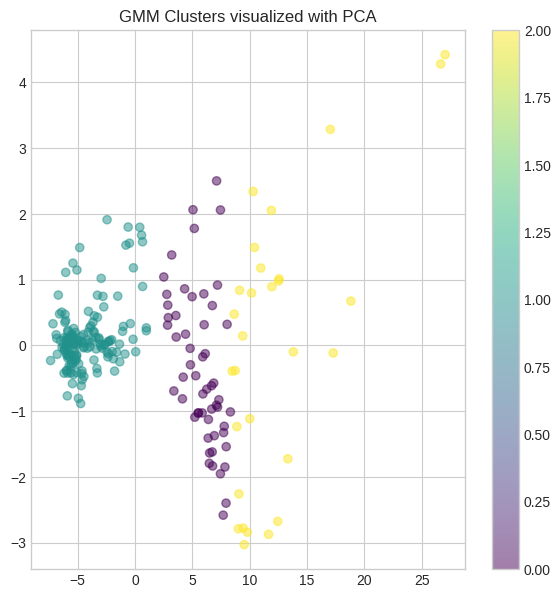

In [ ]:
# Perform PCA for the visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

plt.figure(figsize=(7, 7))
plt.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    c=preds,  # use predictions for coloring
    alpha=0.5,
    cmap="viridis",
)
plt.colorbar()
plt.title('GMM Clusters visualized with PCA')
plt.show()


By combining GMM and PCA, we can visualize the clusters in a two-dimensional plot even if the original data had many dimensions (one for each year). This way, we get a snapshot of how countries group together based on their temperature profiles over the years.

K-means Clustering

In [ ]:
from sklearn import cluster
def get_country_names(labels):
  r=len(set(labels))
  country_clusters={}
  for index,value in enumerate(labels):
    if value not in country_clusters.keys():
      country_clusters[value]=[df_Temp_avg['Country'].iloc[index]]
    else:
      country_clusters[value].append(df_Temp_avg['Country'].iloc[index])



  return country_clusters

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_Temp_avg.loc[:,1970:2012])

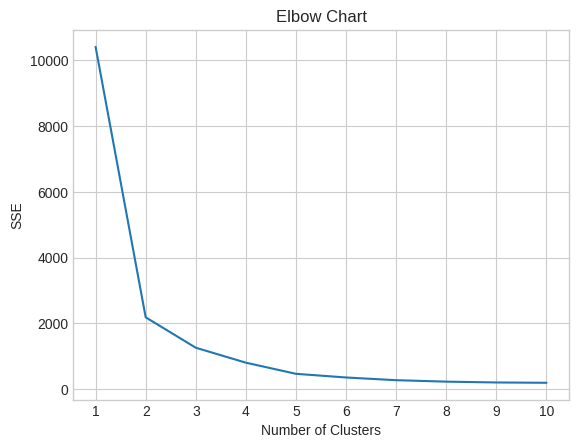

In [ ]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)
#df_co2_final.loc[:,1970:2021]
#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Chart")
plt.show()

In [ ]:
from sklearn import cluster
def get_country_names(labels):
  r=len(set(labels))
  country_clusters={}
  for index,value in enumerate(labels):
    if value not in country_clusters.keys():
      country_clusters[value]=[df_Temp_avg['Country'].iloc[index]]
    else:
      country_clusters[value].append(df_Temp_avg['Country'].iloc[index])



  return country_clusters

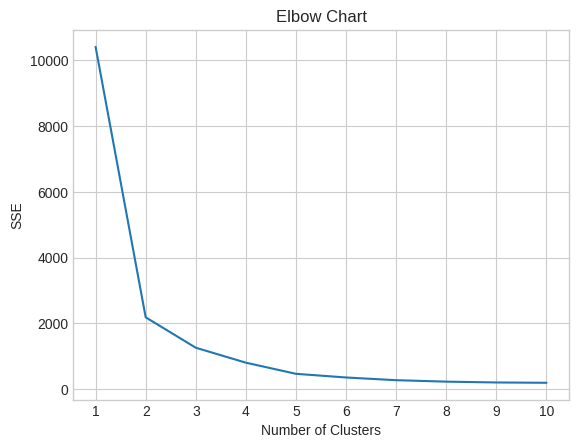

In [ ]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)
#df_co2_final.loc[:,1970:2021]
#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Chart")
plt.show()

Text(0.5, 1.0, 'Silhouette Score After K-Means Clustering')

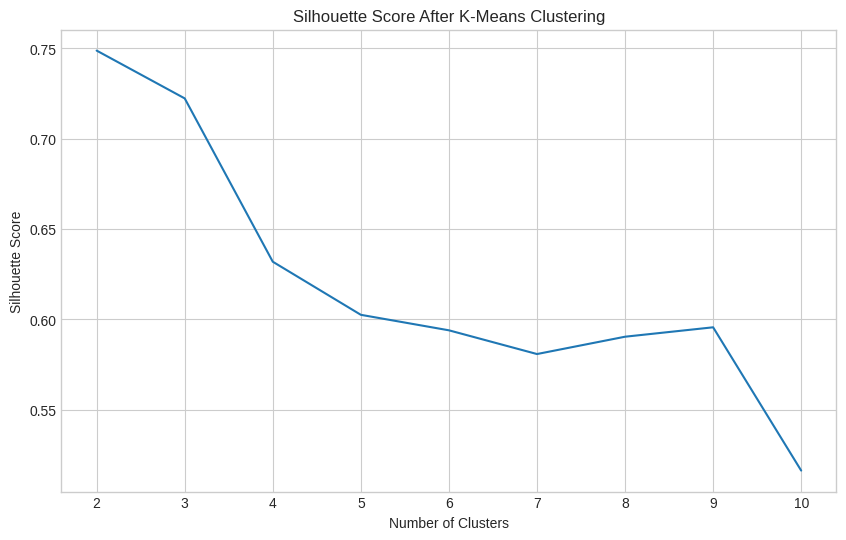

In [ ]:
silhouette_score={}
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
  kmeans.fit(scaled_data)
  silhouette_score[k] = metrics.silhouette_score(scaled_data, kmeans.labels_, random_state=10, metric= 'euclidean')
plt.figure(figsize=(10,6))
plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score After K-Means Clustering")

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_data)
y_kmeans = kmeans.predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


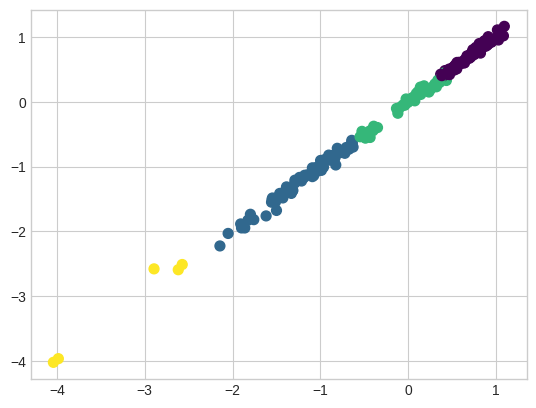

In [ ]:
def plot_scatter(df1,df2,labels):
  plt.scatter(scaled_data[:, 0], scaled_data[:, 42], c=labels, s=50, cmap='viridis')

plot_scatter(scaled_data[:, 0],scaled_data[:, 42],y_kmeans)

In [ ]:
cluster_kmeans=get_country_names(y_kmeans)

In [ ]:
cluster_kmeans

{2: ['Afghanistan',
  'Angola',
  'Argentina',
  'Australia',
  'Bolivia',
  'Botswana',
  'Burundi',
  'Cyprus',
  'Ecuador',
  'Gaza Strip',
  'Greece',
  'Iran',
  'Iraq',
  'Israel',
  'Jordan',
  'Lebanon',
  'Lesotho',
  'Malawi',
  'Malta',
  'Mexico',
  'Morocco',
  'Namibia',
  'Nepal',
  'Oceania',
  'Pakistan',
  'Peru',
  'Portugal',
  'Rwanda',
  'San Marino',
  'South Africa',
  'South America',
  'Spain',
  'Swaziland',
  'Syria',
  'Taiwan',
  'Tunisia',
  'Turkmenistan',
  'Uruguay',
  'Zambia',
  'Zimbabwe'],
 0: ['Africa',
  'Algeria',
  'American Samoa',
  'Anguilla',
  'Antigua And Barbuda',
  'Aruba',
  'Bahamas',
  'Bahrain',
  'Baker Island',
  'Bangladesh',
  'Barbados',
  'Belize',
  'Benin',
  'Bonaire, Saint Eustatius And Saba',
  'Brazil',
  'British Virgin Islands',
  'Burkina Faso',
  'Burma',
  'Cambodia',
  'Cameroon',
  'Cape Verde',
  'Cayman Islands',
  'Central African Republic',
  'Chad',
  'Christmas Island',
  'Colombia',
  'Comoros',
  'Congo',


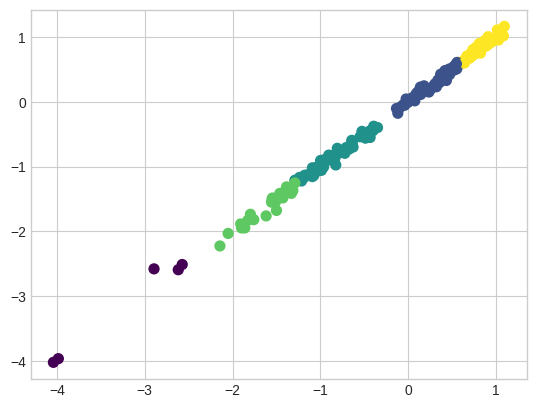

In [ ]:
kmeans_5cluster = KMeans(n_clusters=5, n_init=10)
kmeans_5cluster.fit(scaled_data)
y_kmeans_5cluster = kmeans_5cluster.predict(scaled_data)
plot_scatter(scaled_data[:, 0],scaled_data[:, 42],y_kmeans_5cluster)

In [ ]:
cluster_5kmeans=get_country_names(y_kmeans_5cluster)
cluster_5kmeans

{2: ['Afghanistan',
  'Albania',
  'Andorra',
  'Argentina',
  'Armenia',
  'Asia',
  'Azerbaijan',
  'Belgium',
  'Bhutan',
  'Bosnia And Herzegovina',
  'Bulgaria',
  'Chile',
  'Croatia',
  'Czech Republic',
  'Denmark (Europe)',
  'Europe',
  'France',
  'France (Europe)',
  'Georgia',
  'Germany',
  'Greece',
  'Guernsey',
  'Hungary',
  'Ireland',
  'Isle Of Man',
  'Italy',
  'Japan',
  'Jersey',
  'Lesotho',
  'Luxembourg',
  'Macedonia',
  'Moldova',
  'Monaco',
  'Montenegro',
  'Nepal',
  'Netherlands',
  'Netherlands (Europe)',
  'New Zealand',
  'Poland',
  'Portugal',
  'Romania',
  'San Marino',
  'Serbia',
  'Slovakia',
  'Slovenia',
  'South Korea',
  'Spain',
  'Turkey',
  'Turkmenistan',
  'Ukraine',
  'United Kingdom',
  'United Kingdom (Europe)',
  'United States',
  'Uzbekistan'],
 4: ['Africa',
  'American Samoa',
  'Anguilla',
  'Antigua And Barbuda',
  'Aruba',
  'Bahamas',
  'Bahrain',
  'Baker Island',
  'Bangladesh',
  'Barbados',
  'Belize',
  'Benin',
  'B

In [ ]:
kmeans_3cluster = KMeans(n_clusters=3, n_init=10)
kmeans_3cluster.fit(scaled_data)
y_kmeans_3cluster = kmeans_3cluster.predict(scaled_data)

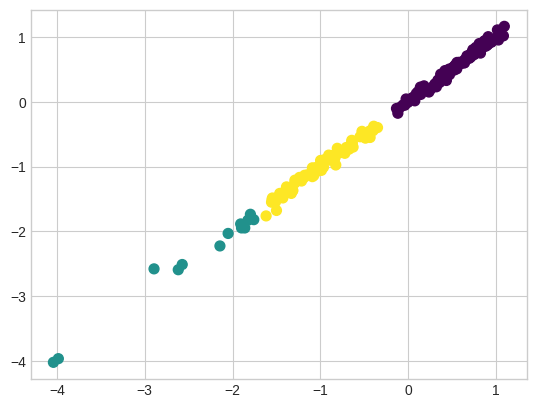

In [ ]:
plot_scatter(scaled_data[:, 0],scaled_data[:, 42],y_kmeans_3cluster)

In [ ]:
cluster_3kmeans=get_country_names(y_kmeans_3cluster)
cluster_3kmeans

{2: ['Afghanistan',
  'Albania',
  'Andorra',
  'Argentina',
  'Armenia',
  'Asia',
  'Austria',
  'Azerbaijan',
  'Belarus',
  'Belgium',
  'Bhutan',
  'Bosnia And Herzegovina',
  'Bulgaria',
  'Chile',
  'China',
  'Croatia',
  'Czech Republic',
  'Denmark (Europe)',
  'Estonia',
  'Europe',
  'Falkland Islands (Islas Malvinas)',
  'Faroe Islands',
  'France',
  'France (Europe)',
  'French Southern And Antarctic Lands',
  'Georgia',
  'Germany',
  'Greece',
  'Guernsey',
  'Hungary',
  'Ireland',
  'Isle Of Man',
  'Italy',
  'Japan',
  'Jersey',
  'Kazakhstan',
  'Kyrgyzstan',
  'Latvia',
  'Lesotho',
  'Liechtenstein',
  'Lithuania',
  'Luxembourg',
  'Macedonia',
  'Moldova',
  'Monaco',
  'Montenegro',
  'Nepal',
  'Netherlands',
  'Netherlands (Europe)',
  'New Zealand',
  'North Korea',
  'Poland',
  'Portugal',
  'Romania',
  'Saint Pierre And Miquelon',
  'San Marino',
  'Serbia',
  'Slovakia',
  'Slovenia',
  'South Korea',
  'Spain',
  'Switzerland',
  'Tajikistan',
  'Tur